<a href="https://colab.research.google.com/github/tannerarriza/fantsy/blob/master/Fantsy_Final_Deliverable.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time
import os

from datetime import datetime
from datetime import date

pd.set_option('display.max_columns', 500)

In [0]:
!pip install -U -q PyDrive

     |████████████████████████████████| 993kB 4.9MB/s 


In [0]:
# pip install Flask

In [0]:

from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
 
# 1. Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [0]:
file_list = drive.ListFile({'q': "'1ObOOFZ5PwU5SWG8OjAxch8BzmHkWrz6S' in parents and trashed=false"}).GetList()
for file1 in file_list:
  print('title: %s, id: %s' % (file1['title'], file1['id']))
  
downloaded = drive.CreateFile({'id': '1d7BFHy0y_9G2HFAFHRjVsiMbmfBMOmCl'})
downloaded.GetContentFile('data.csv')

In [0]:
# # Merging the datasets 
# players = pd.read_csv('data/2012-18_playerBoxScore.csv')
# standings = pd.read_csv('data/2012-18_standings.csv')

# standings.rename(index=str, columns = {"stDate": "gmDate"}, inplace=True)

# set(official.columns).difference(set(players.columns))
# print(players.shape, standings.shape)
# data = players.merge(standings, on = ["gmDate", "teamAbbr"])

# print(players.shape, standings.shape, data.shape)
# set(data.columns).difference(set(official.columns))

# data = data.merge(official, on = ['gmDate', 'teamAbbr'])
# print(data.shape)
# data

In [0]:
#Reading the merged data
data = pd.read_csv('data.csv').drop(['Unnamed: 0'],axis=1)
print(data.shape)
data.head(20)

(465421, 204)


gmDate gmTime_x  seasTyp   playLNm  playFNm teamAbbr teamConf_x  \
0   2012-10-30    19:00  Regular     Price     A.J.      WAS       East   
1   2012-10-30    19:00  Regular     Price     A.J.      WAS       East   
2   2012-10-30    19:00  Regular     Price     A.J.      WAS       East   
3   2012-10-30    19:00  Regular     Ariza   Trevor      WAS       East   
4   2012-10-30    19:00  Regular     Ariza   Trevor      WAS       East   
5   2012-10-30    19:00  Regular     Ariza   Trevor      WAS       East   
6   2012-10-30    19:00  Regular    Okafor    Emeka      WAS       East   
7   2012-10-30    19:00  Regular    Okafor    Emeka      WAS       East   
8   2012-10-30    19:00  Regular    Okafor    Emeka      WAS       East   
9   2012-10-30    19:00  Regular      Beal  Bradley      WAS       East   
10  2012-10-30    19:00  Regular      Beal  Bradley      WAS       East   
11  2012-10-30    19:00  Regular      Beal  Bradley      WAS       East   
12  2012-10-30    19:00  Regular    Booker   Trevor      WAS       East   
13  2012-10-30    19:00  Regular    Booker   Trevor      WAS       East   
14  2012-10-30    19:00  Regular    Booker   Trevor      WAS       East   
15  2012-10-30    19:00  Regular  Crawford   Jordan      WAS       East   
16  2012-10-30    19:00  Regular  Crawford   Jordan      WAS       East   
17  2012-10-30    19:00  Regular  Crawford   Jordan      WAS       East   
18  2012-10-30    19:00  Regular   Webster  Martell      WAS       East   
19  2012-10-30    19:00  Regular   Webster  Martell      WAS       East   

    teamDiv_x teamLoc_x teamRslt_x  teamDayOff_x   offLNm1 offFNm1 offLNm2  \
0   Southeast      Away       Loss             0  Brothers    Tony   Smith   
1   Southeast      Away       Loss             0  Brothers    Tony   Smith   
2   Southeast      Away       Loss             0  Brothers    Tony   Smith   
3   Southeast      Away       Loss             0  Brothers    Tony   Smith   
4   Southeast      Away       Loss             0  Brothers    Tony   Smith   
5   Southeast      Away       Loss             0  Brothers    Tony   Smith   
6   Southeast      Away       Loss             0  Brothers    Tony   Smith   
7   Southeast      Away       Loss             0  Brothers    Tony   Smith   
8   Southeast      Away       Loss             0  Brothers    Tony   Smith   
9   Southeast      Away       Loss             0  Brothers    Tony   Smith   
10  Southeast      Away       Loss             0  Brothers    Tony   Smith   
11  Southeast      Away       Loss             0  Brothers    Tony   Smith   
12  Southeast      Away       Loss             0  Brothers    Tony   Smith   
13  Southeast      Away       Loss             0  Brothers    Tony   Smith   
14  Southeast      Away       Loss             0  Brothers    Tony   Smith   
15  Southeast      Away       Loss             0  Brothers    Tony   Smith   
16  Southeast      Away       Loss             0  Brothers    Tony   Smith   
17  Southeast      Away       Loss             0  Brothers    Tony   Smith   
18  Southeast      Away       Loss             0  Brothers    Tony   Smith   
19  Southeast      Away       Loss             0  Brothers    Tony   Smith   

    offFNm2  offLNm3   offFNm3       playDispNm playStat  playMin playPos  \
0   Michael  Workman  Haywoode       A.J. Price  Starter       29      PG   
1   Michael  Workman  Haywoode       A.J. Price  Starter       29      PG   
2   Michael  Workman  Haywoode       A.J. Price  Starter       29      PG   
3   Michael  Workman  Haywoode     Trevor Ariza  Starter       25      SG   
4   Michael  Workman  Haywoode     Trevor Ariza  Starter       25      SG   
5   Michael  Workman  Haywoode     Trevor Ariza  Starter       25      SG   
6   Michael  Workman  Haywoode     Emeka Okafor  Starter       25       C   
7   Michael  Workman  Haywoode     Emeka Okafor  Starter       25       C   
8   Michael  Workman  Haywoode     Emeka Okafor  Starter       25       C   
9   Michael  Workman  H

In [0]:
#Checking which columns are null
data[data.isna()].head()

gmDate gmTime_x seasTyp playLNm playFNm teamAbbr teamConf_x teamDiv_x  \
0    NaN      NaN     NaN     NaN     NaN      NaN        NaN       NaN   
1    NaN      NaN     NaN     NaN     NaN      NaN        NaN       NaN   
2    NaN      NaN     NaN     NaN     NaN      NaN        NaN       NaN   
3    NaN      NaN     NaN     NaN     NaN      NaN        NaN       NaN   
4    NaN      NaN     NaN     NaN     NaN      NaN        NaN       NaN   

  teamLoc_x teamRslt_x  teamDayOff_x offLNm1 offFNm1 offLNm2 offFNm2 offLNm3  \
0       NaN        NaN           NaN     NaN     NaN     NaN     NaN     NaN   
1       NaN        NaN           NaN     NaN     NaN     NaN     NaN     NaN   
2       NaN        NaN           NaN     NaN     NaN     NaN     NaN     NaN   
3       NaN        NaN           NaN     NaN     NaN     NaN     NaN     NaN   
4       NaN        NaN           NaN     NaN     NaN     NaN     NaN     NaN   

  offFNm3 playDispNm playStat  playMin playPos  playHeight  playWeight  \
0     NaN        NaN      NaN      NaN     NaN         NaN         NaN   
1     NaN        NaN      NaN      NaN     NaN         NaN         NaN   
2     NaN        NaN      NaN      NaN     NaN         NaN         NaN   
3     NaN        NaN      NaN      NaN     NaN         NaN         NaN   
4     NaN        NaN      NaN      NaN     NaN         NaN         NaN   

  playBDate  playPTS  playAST  playTO  playSTL  playBLK  playPF  playFGA  \
0       NaN      NaN      NaN     NaN      NaN      NaN     NaN      NaN   
1       NaN      NaN      NaN     NaN      NaN      NaN     NaN      NaN   
2       NaN      NaN      NaN     NaN      NaN      NaN     NaN      NaN   
3       NaN      NaN      NaN     NaN      NaN      NaN     NaN      NaN   
4       NaN      NaN      NaN     NaN      NaN      NaN     NaN      NaN   

   playFGM  playFG%  play2PA  play2PM  play2P%  play3PA  play3PM  play3P%  \
0      NaN      NaN      NaN      NaN      NaN      NaN      NaN      NaN   
1      NaN      NaN      NaN      NaN      NaN      NaN      NaN      NaN   
2      NaN      NaN      NaN      NaN      NaN      NaN      NaN      NaN   
3      NaN      NaN      NaN      NaN      NaN      NaN      NaN      NaN   
4      NaN      NaN      NaN      NaN      NaN      NaN      NaN      NaN   

   playFTA  playFTM  playFT%  playORB  playDRB  playTRB opptAbbr_x opptConf_x  \
0      NaN      NaN      NaN      NaN      NaN      NaN        NaN        NaN   
1      NaN      NaN      NaN      NaN      NaN      NaN        NaN        NaN   
2      NaN      NaN      NaN      NaN      NaN      NaN        NaN        NaN   
3      NaN      NaN      NaN      NaN      NaN      NaN        NaN        NaN   
4      NaN      NaN      NaN      NaN      NaN      NaN        NaN        NaN   

  opptDiv_x opptLoc_x opptRslt_x  opptDayOff_x  rank rankOrd  gameWon  \
0       NaN       NaN        NaN           NaN   NaN     NaN      NaN   
1       NaN       NaN        NaN           NaN   NaN     NaN      NaN   
2       NaN       NaN        NaN           NaN   NaN     NaN      NaN   
3       NaN       NaN        NaN           NaN   NaN     NaN      NaN   
4       NaN       NaN        NaN           NaN   NaN     NaN      NaN   

   gameLost  stk stkType  stkTot  gameBack  ptsFor  ptsAgnst  homeWin  \
0       NaN  NaN     NaN     NaN       NaN     NaN       NaN      NaN   
1       NaN  NaN     NaN     NaN       NaN     NaN       NaN      NaN   
2       NaN  NaN     NaN     NaN       NaN     NaN       NaN      NaN   
3       NaN  NaN     NaN     NaN       NaN     NaN       NaN      NaN   
4       NaN  NaN     NaN     NaN       NaN     NaN       NaN      NaN   

   homeLoss  awayWin  awayLoss  confWin  confLoss  lastFive  lastTen  \
0       NaN      NaN       NaN      NaN       NaN       NaN      NaN   
1       NaN      NaN       NaN      NaN       NaN       NaN      NaN   
2       NaN      NaN       NaN      NaN       NaN       NaN      NaN   
3       NaN      NaN       NaN      NaN       NaN   

In [0]:
'''Create a function to calculate age from date of birth'''
def age_calc(dob):
    dob = datetime.strptime(dob, "%Y-%m-%d").date()
    #dob = datetime.strptime(dob, "%d.%m.%Y").date()
    today = date.today()
    return today.year - dob.year - ((today.month, today.day) < (dob.month, dob.day))

In [0]:
'''Add a new column in dataset with player's calculated age'''
data['age'] = data['playBDate'].apply(age_calc)
data.head(5)

gmDate gmTime_x  seasTyp playLNm playFNm teamAbbr teamConf_x  \
0  2012-10-30    19:00  Regular   Price    A.J.      WAS       East   
1  2012-10-30    19:00  Regular   Price    A.J.      WAS       East   
2  2012-10-30    19:00  Regular   Price    A.J.      WAS       East   
3  2012-10-30    19:00  Regular   Ariza  Trevor      WAS       East   
4  2012-10-30    19:00  Regular   Ariza  Trevor      WAS       East   

   teamDiv_x teamLoc_x teamRslt_x  teamDayOff_x   offLNm1 offFNm1 offLNm2  \
0  Southeast      Away       Loss             0  Brothers    Tony   Smith   
1  Southeast      Away       Loss             0  Brothers    Tony   Smith   
2  Southeast      Away       Loss             0  Brothers    Tony   Smith   
3  Southeast      Away       Loss             0  Brothers    Tony   Smith   
4  Southeast      Away       Loss             0  Brothers    Tony   Smith   

   offFNm2  offLNm3   offFNm3    playDispNm playStat  playMin playPos  \
0  Michael  Workman  Haywoode    A.J. Price  Starter       29      PG   
1  Michael  Workman  Haywoode    A.J. Price  Starter       29      PG   
2  Michael  Workman  Haywoode    A.J. Price  Starter       29      PG   
3  Michael  Workman  Haywoode  Trevor Ariza  Starter       25      SG   
4  Michael  Workman  Haywoode  Trevor Ariza  Starter       25      SG   

   playHeight  playWeight   playBDate  playPTS  playAST  playTO  playSTL  \
0          74         195  1986-10-07        7        6       1        0   
1          74         195  1986-10-07        7        6       1        0   
2          74         195  1986-10-07        7        6       1        0   
3          80         200  1985-06-30        9        4       0        3   
4          80         200  1985-06-30        9        4       0        3   

   playBLK  playPF  playFGA  playFGM  playFG%  play2PA  play2PM  play2P%  \
0        0       1       13        2   0.1538        4        0     0.00   
1        0       1       13        2   0.1538        4        0     0.00   
2        0       1       13        2   0.1538        4        0     0.00   
3        2       0        8        3   0.3750        4        1     0.25   
4        2       0        8        3   0.3750        4        1     0.25   

   play3PA  play3PM  play3P%  playFTA  playFTM  playFT%  playORB  playDRB  \
0        9        2   0.2222        1        1      1.0        1        1   
1        9        2   0.2222        1        1      1.0        1        1   
2        9        2   0.2222        1        1      1.0        1        1   
3        4        2   0.5000        2        1      0.5        1        2   
4        4        2   0.5000        2        1      0.5        1        2   

   playTRB opptAbbr_x opptConf_x opptDiv_x opptLoc_x opptRslt_x  opptDayOff_x  \
0        2        CLE       East   Central      Home        Win             0   
1        2        CLE       East   Central      Home        Win             0   
2        2        CLE       East   Central      Home        Win             0   
3        3        CLE       East   Central      Home        Win             0   
4        3        CLE       East   Central      Home        Win             0   

   rank rankOrd  gameWon  gameLost stk stkType  stkTot  gameBack  ptsFor  \
0    14    14th        0         1  L1    loss       1       1.0      84   
1    14    14th        0         1  L1    loss       1       1.0      84   
2    14    14th        0         1  L1    loss       1       1.0      84   
3    14    14th        0         1  L1    loss       1       1.0      84   
4    14    14th        0         1  L1    loss       1       1.0      84   

   ptsAgnst  homeWin  homeLoss  awayWin  awayLoss  confWin  confLoss  \
0        94        0         0        0         1        0         1   
1        94        0         0        0         1        0         1   
2        94        0         0        0         1        0         1   
3        94        0         0        0         1        0         1 

In [0]:
'''For linear regression to work, extract Year and Month of game; Leaving out day & time'''
data['game_year'] = pd.DatetimeIndex(data['gmDate']).year
data['game_month'] = pd.DatetimeIndex(data['gmDate']).month
data.head()

gmDate gmTime_x  seasTyp playLNm playFNm teamAbbr teamConf_x  \
0  2012-10-30    19:00  Regular   Price    A.J.      WAS       East   
1  2012-10-30    19:00  Regular   Price    A.J.      WAS       East   
2  2012-10-30    19:00  Regular   Price    A.J.      WAS       East   
3  2012-10-30    19:00  Regular   Ariza  Trevor      WAS       East   
4  2012-10-30    19:00  Regular   Ariza  Trevor      WAS       East   

   teamDiv_x teamLoc_x teamRslt_x  teamDayOff_x   offLNm1 offFNm1 offLNm2  \
0  Southeast      Away       Loss             0  Brothers    Tony   Smith   
1  Southeast      Away       Loss             0  Brothers    Tony   Smith   
2  Southeast      Away       Loss             0  Brothers    Tony   Smith   
3  Southeast      Away       Loss             0  Brothers    Tony   Smith   
4  Southeast      Away       Loss             0  Brothers    Tony   Smith   

   offFNm2  offLNm3   offFNm3    playDispNm playStat  playMin playPos  \
0  Michael  Workman  Haywoode    A.J. Price  Starter       29      PG   
1  Michael  Workman  Haywoode    A.J. Price  Starter       29      PG   
2  Michael  Workman  Haywoode    A.J. Price  Starter       29      PG   
3  Michael  Workman  Haywoode  Trevor Ariza  Starter       25      SG   
4  Michael  Workman  Haywoode  Trevor Ariza  Starter       25      SG   

   playHeight  playWeight   playBDate  playPTS  playAST  playTO  playSTL  \
0          74         195  1986-10-07        7        6       1        0   
1          74         195  1986-10-07        7        6       1        0   
2          74         195  1986-10-07        7        6       1        0   
3          80         200  1985-06-30        9        4       0        3   
4          80         200  1985-06-30        9        4       0        3   

   playBLK  playPF  playFGA  playFGM  playFG%  play2PA  play2PM  play2P%  \
0        0       1       13        2   0.1538        4        0     0.00   
1        0       1       13        2   0.1538        4        0     0.00   
2        0       1       13        2   0.1538        4        0     0.00   
3        2       0        8        3   0.3750        4        1     0.25   
4        2       0        8        3   0.3750        4        1     0.25   

   play3PA  play3PM  play3P%  playFTA  playFTM  playFT%  playORB  playDRB  \
0        9        2   0.2222        1        1      1.0        1        1   
1        9        2   0.2222        1        1      1.0        1        1   
2        9        2   0.2222        1        1      1.0        1        1   
3        4        2   0.5000        2        1      0.5        1        2   
4        4        2   0.5000        2        1      0.5        1        2   

   playTRB opptAbbr_x opptConf_x opptDiv_x opptLoc_x opptRslt_x  opptDayOff_x  \
0        2        CLE       East   Central      Home        Win             0   
1        2        CLE       East   Central      Home        Win             0   
2        2        CLE       East   Central      Home        Win             0   
3        3        CLE       East   Central      Home        Win             0   
4        3        CLE       East   Central      Home        Win             0   

   rank rankOrd  gameWon  gameLost stk stkType  stkTot  gameBack  ptsFor  \
0    14    14th        0         1  L1    loss       1       1.0      84   
1    14    14th        0         1  L1    loss       1       1.0      84   
2    14    14th        0         1  L1    loss       1       1.0      84   
3    14    14th        0         1  L1    loss       1       1.0      84   
4    14    14th        0         1  L1    loss       1       1.0      84   

   ptsAgnst  homeWin  homeLoss  awayWin  awayLoss  confWin  confLoss  \
0        94        0         0        0         1        0         1   
1        94        0         0        0         1        0         1   
2        94        0         0        0         1        0         1   
3        94        0         0        0         1        0         1 

# Data Exploration / EDA

In [0]:
data.describe()

teamDayOff_x        playMin     playHeight     playWeight  \
count  465421.000000  465421.000000  465421.000000  465421.000000   
mean        1.940875      22.926436      79.012859     217.971589   
std         1.073462      10.677801       3.430048      25.939021   
min         0.000000       0.000000      69.000000     149.000000   
25%         1.000000      15.000000      77.000000     200.000000   
50%         2.000000      24.000000      79.000000     220.000000   
75%         2.000000      31.000000      82.000000     237.000000   
max        11.000000      60.000000      89.000000     355.000000   

             playPTS        playAST         playTO        playSTL  \
count  465421.000000  465421.000000  465421.000000  465421.000000   
mean        9.695173       2.121978       1.305115       0.734765   
std         7.865467       2.474642       1.391391       0.982155   
min         0.000000       0.000000       0.000000       0.000000   
25%         4.000000       0.000000       0.000000       0.000000   
50%         8.000000       1.000000       1.000000       0.000000   
75%        14.000000       3.000000       2.000000       1.000000   
max        70.000000      25.000000      12.000000      10.000000   

             playBLK         playPF        playFGA        playFGM  \
count  465421.000000  465421.000000  465421.000000  465421.000000   
mean        0.460843       1.908103       7.971164       3.621534   
std         0.854784       1.455378       5.523617       2.964406   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.000000       1.000000       4.000000       1.000000   
50%         0.000000       2.000000       7.000000       3.000000   
75%         1.000000       3.000000      11.000000       5.000000   
max        12.000000       6.000000      50.000000      24.000000   

             playFG%        play2PA        play2PM        play2P%  \
count  465421.000000  465421.000000  465421.000000  465421.000000   
mean        0.419570       5.696722       2.809388       0.438209   
std         0.247442       4.557002       2.606041       0.294721   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.280000       2.000000       1.000000       0.250000   
50%         0.428600       5.000000       2.000000       0.500000   
75%         0.571400       8.000000       4.000000       0.625000   
max         1.000000      34.000000      22.000000       1.000000   

             play3PA        play3PM        play3P%        playFTA  \
count  465421.000000  465421.000000  465421.000000  465421.000000   
mean        2.274442       0.812146       0.211503       2.160676   
std         2.539693       1.231818       0.292850       2.756974   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.000000       0.000000       0.000000       0.000000   
50%         2.000000       0.000000       0.000000       2.000000   
75%         4.000000       1.000000       0.400000       4.000000   
max        22.000000      13.000000       1.000000      39.000000   

             playFTM        playFT%        playORB        playDRB  \
count  465421.000000  465421.000000  465421.000000  465421.000000   
mean        1.639965       0.427240       0.999553       3.092001   
std         2.248009       0.429605       1.392688       2.697149   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.000000       0.000000       0.000000       1.000000   
50%         1.000000       0.500000       1.000000       2.000000   
75%         2.000000       0.909100       1.000000       4.000000   
max        25.000000       1.000000      18.000000      23.000000   

             playTRB   opptDayOff_x           rank        gameWon  \
count  465421.000000  465421.000000  465421.000000  465421.000000   
mean        4.091554       1.938864       7.679103      20.807961   
std         3.496626       1.072999       4.358935      14.154854   


### Visualization of selected interesting data points distribution values

#### Player Height distribution

[]

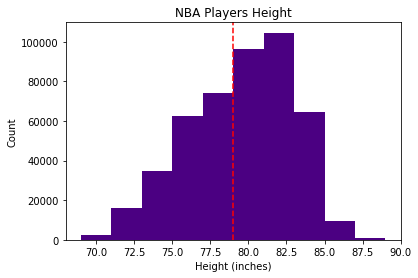

In [0]:
'''Player Height distribution'''
plt.hist(data["playHeight"], color="indigo")
plt.title("NBA Players Height")
plt.xlabel("Height (inches)")
plt.ylabel("Count")
plt.axvline(data['playHeight'].mean(), color='r', linestyle='dashed')
plt.plot()


#### Age distribution

[]

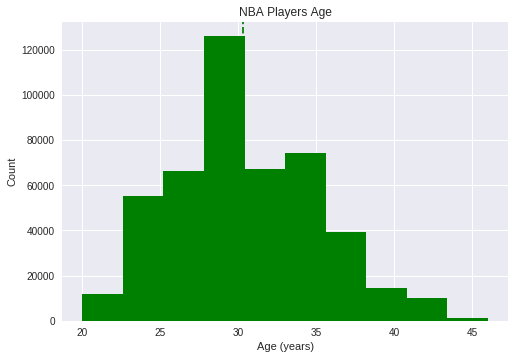

In [0]:
'''Age distribution'''
plt.hist(data["age"], color="green")
plt.title("NBA Players Age")
plt.xlabel("Age (years)")
plt.ylabel("Count")
plt.axvline(data['age'].mean(), color='g', linestyle='dashed')
plt.plot()

### Selected Comparisons - 3 points made vs attempted


Average three pointers made is:  0.8121464222714488
Average three pointers attempted is:  2.274441849422351


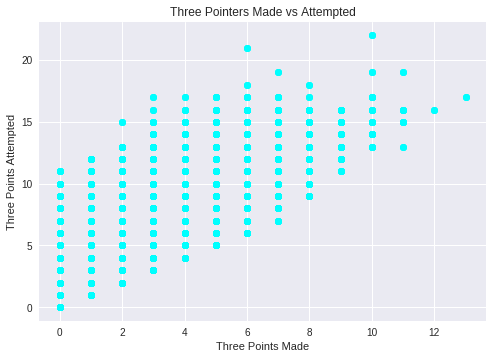

In [0]:
'''Comparing the three points attempted and the three points made'''
plt.plot(data["play3PM"], data["play3PA"], "o", color="aqua")
plt.title("Three Pointers Made vs Attempted")
plt.xlabel("Three Points Made")
plt.ylabel("Three Points Attempted")
plt.show
print("Average three pointers made is: ", data["play3PM"].mean())
print("Average three pointers attempted is: ", data["play3PA"].mean())


#### Player Height vs Blocks Distribution

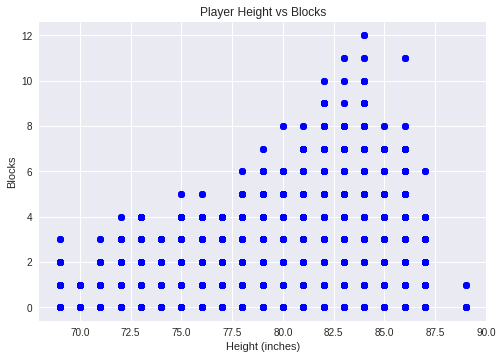

In [0]:
plt.plot(data.playHeight, data.playBLK, "o", color='b')
plt.title("Player Height vs Blocks")
plt.xlabel("Height (inches)")
plt.ylabel("Blocks")
plt.show()

### Visualization with pair plots to compare various metrics against each other, using Seaborn

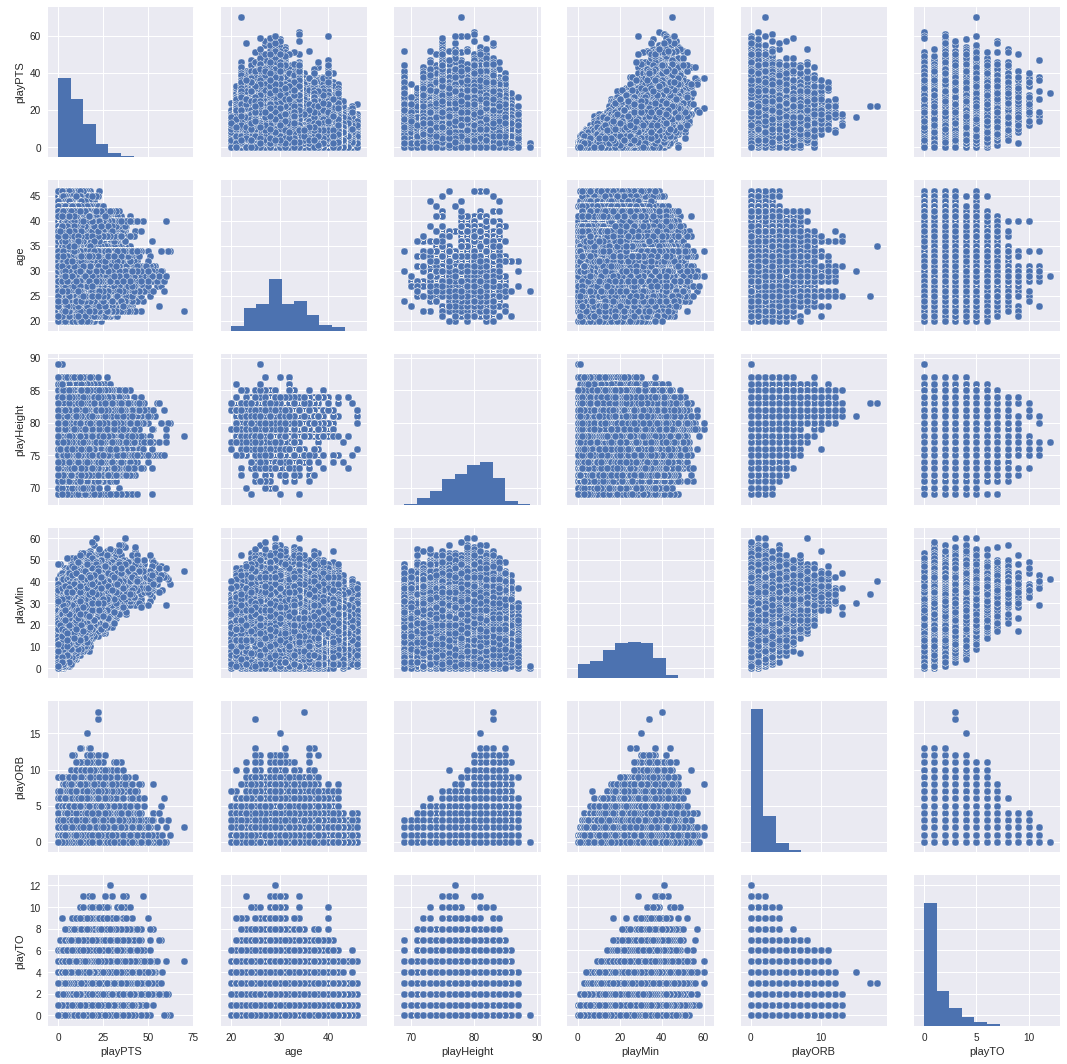

In [0]:
'''Plots of relationships between Player Points Scored, Age, Height, Minutes Played, Offensive Rebound, TurnOvers made''' 

sns.pairplot(data, vars = ["playPTS", "age", "playHeight", "playMin",  "playORB", "playTO"], dropna = True)

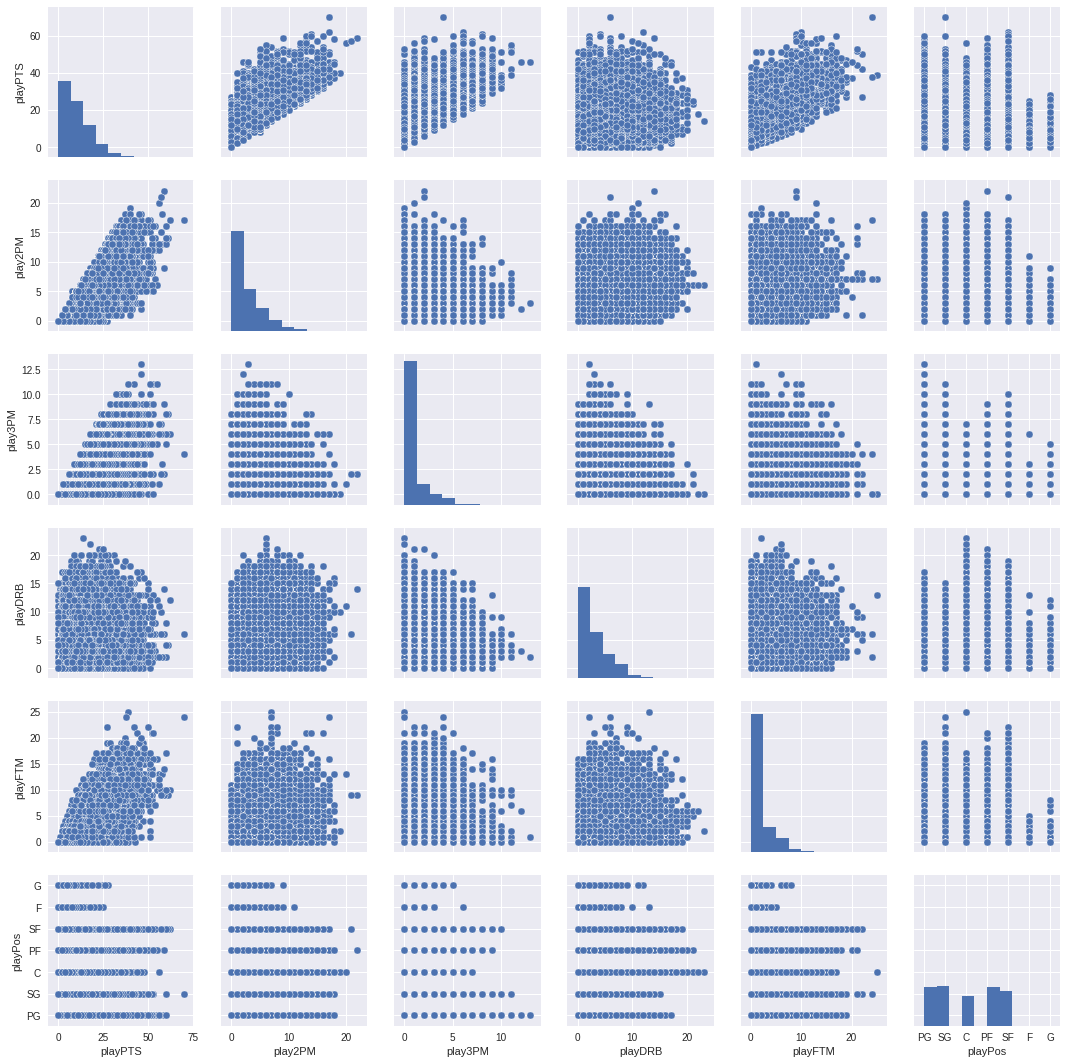

In [0]:


'''Pairplots for relationships between Player Points Scored, 2 Point Shots Made, 3 Point Shots Made, 
Defensive Rebound, Free throw shots made, Player position'''

sns.pairplot(data, vars = [ "playPTS", "play2PM", "play3PM", "playDRB", "playFTM", "playPos"], dropna = True)

#### Compare LeBron James performances : Points Scored vs other scoring metrics

In [0]:

data_lebron = data[data['playDispNm'].str.contains('LeBron James')]
data_lebron.head()

gmDate gmTime_x  seasTyp playLNm playFNm teamAbbr teamConf_x  \
102   2012-10-30    20:00  Regular   James  LeBron      MIA       East   
103   2012-10-30    20:00  Regular   James  LeBron      MIA       East   
104   2012-10-30    20:00  Regular   James  LeBron      MIA       East   
1131  2012-11-02    20:00  Regular   James  LeBron      MIA       East   
1132  2012-11-02    20:00  Regular   James  LeBron      MIA       East   

      teamDiv_x teamLoc_x teamRslt_x  teamDayOff_x    offLNm1  offFNm1  \
102   Southeast      Home        Win             0  McCutchen    Monty   
103   Southeast      Home        Win             0  McCutchen    Monty   
104   Southeast      Home        Win             0  McCutchen    Monty   
1131  Southeast      Away       Loss             3      Smith  Michael   
1132  Southeast      Away       Loss             3      Smith  Michael   

       offLNm2  offFNm2     offLNm3 offFNm3    playDispNm playStat  playMin  \
102     Wright     Sean  Fitzgerald    Kane  LeBron James  Starter       29   
103     Wright     Sean  Fitzgerald    Kane  LeBron James  Starter       29   
104     Wright     Sean  Fitzgerald    Kane  LeBron James  Starter       29   
1131  Stafford  Derrick     Buchert    Nick  LeBron James  Starter       37   
1132  Stafford  Derrick     Buchert    Nick  LeBron James  Starter       37   

     playPos  playHeight  playWeight   playBDate  playPTS  playAST  playTO  \
102       SF          80         240  1984-12-30       26        3       0   
103       SF          80         240  1984-12-30       26        3       0   
104       SF          80         240  1984-12-30       26        3       0   
1131      SF          80         240  1984-12-30       23        5       5   
1132      SF          80         240  1984-12-30       23        5       5   

      playSTL  playBLK  playPF  playFGA  playFGM  playFG%  play2PA  play2PM  \
102         2        0       2       16       10    0.625       12        8   
103         2        0       2       16       10    0.625       12        8   
104         2        0       2       16       10    0.625       12        8   
1131        0        3       2       16        8    0.500       13        6   
1132        0        3       2       16        8    0.500       13        6   

      play2P%  play3PA  play3PM  play3P%  playFTA  playFTM  playFT%  playORB  \
102    0.6667        4        2   0.5000        5        4   0.8000        1   
103    0.6667        4        2   0.5000        5        4   0.8000        1   
104    0.6667        4        2   0.5000        5        4   0.8000        1   
1131   0.4615        3        2   0.6667        6        5   0.8333        0   
1132   0.4615        3        2   0.6667        6        5   0.8333        0   

      playDRB  playTRB opptAbbr_x opptConf_x opptDiv_x opptLoc_x opptRslt_x  \
102         9       10        BOS       East  Atlantic      Away       Loss   
103         9       10        BOS       East  Atlantic      Away       Loss   
104         9       10        BOS       East  Atlantic      Away       Loss   
1131        7        7         NY       East  Atlantic      Home        Win   
1132        7        7         NY       East  Atlantic      Home        Win   

      opptDayOff_x  rank rankOrd  gameWon  gameLost stk stkType  stkTot  \
102              0     1     1st        1         0  W1     win       1   
103              0     1     1st        1         0  W1     win       1   
104              0     1     1st        1         0  W1     win       1   
1131             0     8     8th        1         1  L1    loss       1   
1132             0     8     8th        1         1  L1    loss       1   

      gameBack  ptsFor  ptsAgnst  homeWin  homeLoss  awayWin  awayLoss  \
102        0.0     120       107        1         0        0         0   
103        0.0     120       107        1         0        0         0   
104        0.0     120       107        1         0        0         0  

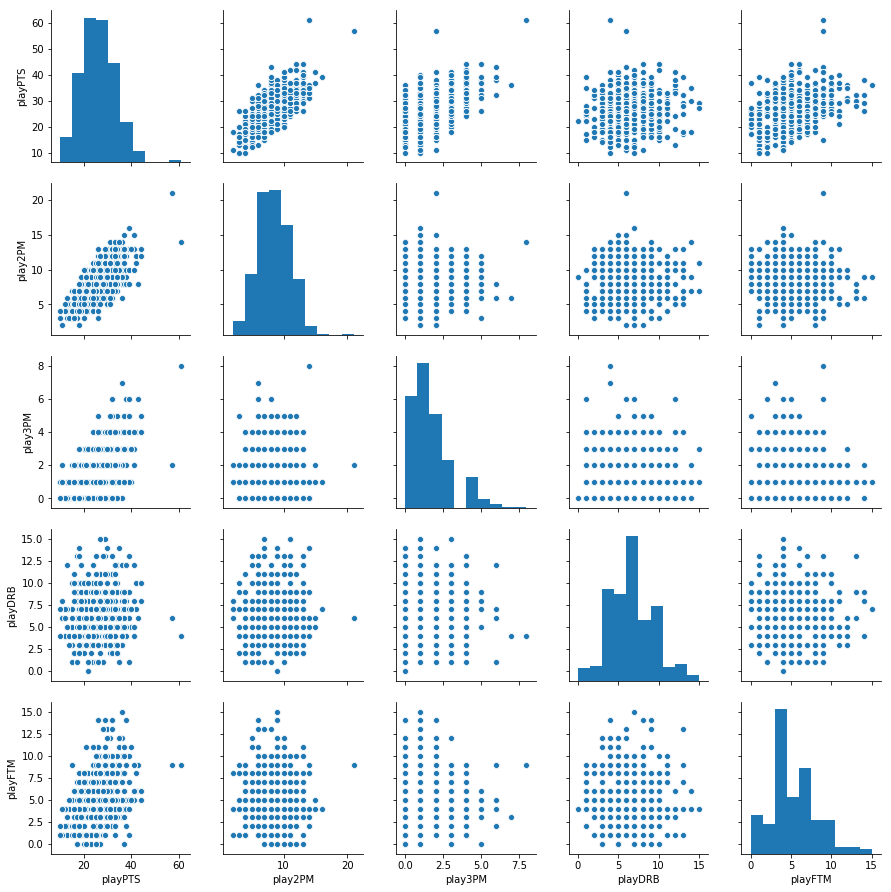

In [0]:
sns.pairplot(data_lebron, vars = [ "playPTS", "play2PM", "play3PM", "playDRB", "playFTM"], dropna = True)

In [0]:
before = data.shape[0]
data = data.dropna()
after = data.shape[0]
print(f'We dropped {before - after} rows ')

We dropped 82 rows 


In [0]:
'''No more NA observations''' 
data.isna().sum().sum()

0

In [0]:
'''columns to drop'''
print(data['seasTyp'].unique())

data = data.drop(['seasTyp'],axis=1) # only one season type
data.head()

['Regular']


gmDate gmTime_x playLNm playFNm teamAbbr teamConf_x  teamDiv_x  \
0  2012-10-30    19:00   Price    A.J.      WAS       East  Southeast   
1  2012-10-30    19:00   Price    A.J.      WAS       East  Southeast   
2  2012-10-30    19:00   Price    A.J.      WAS       East  Southeast   
3  2012-10-30    19:00   Ariza  Trevor      WAS       East  Southeast   
4  2012-10-30    19:00   Ariza  Trevor      WAS       East  Southeast   

  teamLoc_x teamRslt_x  teamDayOff_x   offLNm1 offFNm1 offLNm2  offFNm2  \
0      Away       Loss             0  Brothers    Tony   Smith  Michael   
1      Away       Loss             0  Brothers    Tony   Smith  Michael   
2      Away       Loss             0  Brothers    Tony   Smith  Michael   
3      Away       Loss             0  Brothers    Tony   Smith  Michael   
4      Away       Loss             0  Brothers    Tony   Smith  Michael   

   offLNm3   offFNm3    playDispNm playStat  playMin playPos  playHeight  \
0  Workman  Haywoode    A.J. Price  Starter       29      PG          74   
1  Workman  Haywoode    A.J. Price  Starter       29      PG          74   
2  Workman  Haywoode    A.J. Price  Starter       29      PG          74   
3  Workman  Haywoode  Trevor Ariza  Starter       25      SG          80   
4  Workman  Haywoode  Trevor Ariza  Starter       25      SG          80   

   playWeight   playBDate  playPTS  playAST  playTO  playSTL  playBLK  playPF  \
0         195  1986-10-07        7        6       1        0        0       1   
1         195  1986-10-07        7        6       1        0        0       1   
2         195  1986-10-07        7        6       1        0        0       1   
3         200  1985-06-30        9        4       0        3        2       0   
4         200  1985-06-30        9        4       0        3        2       0   

   playFGA  playFGM  playFG%  play2PA  play2PM  play2P%  play3PA  play3PM  \
0       13        2   0.1538        4        0     0.00        9        2   
1       13        2   0.1538        4        0     0.00        9        2   
2       13        2   0.1538        4        0     0.00        9        2   
3        8        3   0.3750        4        1     0.25        4        2   
4        8        3   0.3750        4        1     0.25        4        2   

   play3P%  playFTA  playFTM  playFT%  playORB  playDRB  playTRB opptAbbr_x  \
0   0.2222        1        1      1.0        1        1        2        CLE   
1   0.2222        1        1      1.0        1        1        2        CLE   
2   0.2222        1        1      1.0        1        1        2        CLE   
3   0.5000        2        1      0.5        1        2        3        CLE   
4   0.5000        2        1      0.5        1        2        3        CLE   

  opptConf_x opptDiv_x opptLoc_x opptRslt_x  opptDayOff_x  rank rankOrd  \
0       East   Central      Home        Win             0    14    14th   
1       East   Central      Home        Win             0    14    14th   
2       East   Central      Home        Win             0    14    14th   
3       East   Central      Home        Win             0    14    14th   
4       East   Central      Home        Win             0    14    14th   

   gameWon  gameLost stk stkType  stkTot  gameBack  ptsFor  ptsAgnst  homeWin  \
0        0         1  L1    loss       1       1.0      84        94        0   
1        0         1  L1    loss       1       1.0      84        94        0   
2        0         1  L1    loss       1       1.0      84        94        0   
3        0         1  L1    loss       1       1.0      84        94        0   
4        0         1  L1    loss       1       1.0      84        94        0   

   homeLoss  awayWin  awayLoss  confWin  confLoss  lastFive  lastTen  \
0         0        0         1        0         1         0        0   
1         0        0         1        0         1         0        0   
2         0        0         1        0         1         0        0   
3        

In [0]:
'''Creating a table where each observation is a player and also creating a list 
of aggregation functions for each possible relevant column''' 


cols = {'gmDate':'count',
'playStat': pd.Series.mode, # tells us 
'playMin': 'mean',    # number of minutes on the floor 
'playPos':pd.Series.mode,# his position on the team
'playHeight':pd.Series.mode,
'playBDate':pd.Series.mode,
 'playPTS': 'mean', # pts
 'playAST': 'mean', # assists
 'playTO':'mean',    # turnovers
 'playSTL': 'mean', # steals
 'playBLK': 'mean', # blocks 
 'playPF': 'mean',   # personal fouls made 
 'playFGA':'mean',    # attempts field goals
 'playFGM':'mean',   # shots made 
 'playFG%':'mean',   # FGA accruacy 
 'play2P%':'mean',   # 2pt  percentage made 
 'play2PA':'mean',   # 2[t attempts ] made 
 'play2PM':'mean',   # 2pt shots made  
 'play2P%':'mean',   # FGA accruacy 
 'play3PA':'mean',   # 3pt attept s
  'play3PM':'mean',   # 3pt made 
 'play3P%':'mean',   # 3pt accruacy 
 'playFTA':'mean',   # free thriow attempt s
 'playFTM':'mean',  # free throw makes 
 'playFT%':'mean',  # free throw percentage 
 'playORB':'mean',   # rebounds offensive 
 'playDRB':'mean',   # rebounds def 
 'playTRB':'mean',    # total
 'gameWon': 'count'
} 


#Feature Engineering


In [0]:
'''A function to calculate the fantasy score. The fantasy score is based off of the offical NBA scoring system '''
def fantasy_score(x):
    points = x['playPTS'] * 1
  
    rebounds = x['playORB'] * 1.2
  
    assists = x['playAST'] * 1.5
  
    steals = x['playSTL'] * 3 
  
    blocks = x['playBLK'] * 3
  
    turnovers = x['playTO'] * -1
  
    total = points + rebounds + assists + steals + blocks + turnovers
    return total


In [0]:
'''Adding a new column called fantasy_score to data'''
data['fantasy_score'] = fantasy_score(data)
data.head()

'''We had duplicate rows, so this removes them'''
data = data[::3]

In [0]:
'''We wanted to see if we should convert the playMin attribute to a binary feature instead of a count feature. For instance, we would
convert all players who had more than 30 min. played on average during the season up to this point to 1 and less than 30 min. to 0'''

plt.scatter(data['playMin'], data['fantasy_score'], alpha=.005)
plt.xlabel('Minutes played')
plt.ylabel('Fantasy Score')

'''The findings, however, are inconclusive and do not provide support to make this feature augmentation'''

'The findings, however, are inconclusive and do not provide support to make this feature augmentation'

[Text(0, 0.5, 'Fantasy Score'), Text(0.5, 0, "Player's Height")]

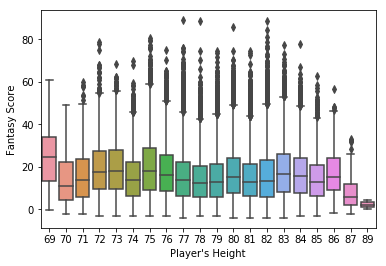

In [0]:
'''Wanted to see if we should add a feature that would determine how the players height would impact the fantasy score.'''

ax = sns.boxplot(data['playHeight'], data['fantasy_score'])
ax.set(xlabel='Player\'s Height', ylabel='Fantasy Score')


_

In [0]:
list(data.columns)

['gmDate',
 'gmTime_x',
 'playLNm',
 'playFNm',
 'teamAbbr',
 'teamConf_x',
 'teamDiv_x',
 'teamLoc_x',
 'teamRslt_x',
 'teamDayOff_x',
 'offLNm1',
 'offFNm1',
 'offLNm2',
 'offFNm2',
 'offLNm3',
 'offFNm3',
 'playDispNm',
 'playStat',
 'playMin',
 'playPos',
 'playHeight',
 'playWeight',
 'playBDate',
 'playPTS',
 'playAST',
 'playTO',
 'playSTL',
 'playBLK',
 'playPF',
 'playFGA',
 'playFGM',
 'playFG%',
 'play2PA',
 'play2PM',
 'play2P%',
 'play3PA',
 'play3PM',
 'play3P%',
 'playFTA',
 'playFTM',
 'playFT%',
 'playORB',
 'playDRB',
 'playTRB',
 'opptAbbr_x',
 'opptConf_x',
 'opptDiv_x',
 'opptLoc_x',
 'opptRslt_x',
 'opptDayOff_x',
 'rank',
 'rankOrd',
 'gameWon',
 'gameLost',
 'stk',
 'stkType',
 'stkTot',
 'gameBack',
 'ptsFor',
 'ptsAgnst',
 'homeWin',
 'homeLoss',
 'awayWin',
 'awayLoss',
 'confWin',
 'confLoss',
 'lastFive',
 'lastTen',
 'gamePlay',
 'ptsScore',
 'ptsAllow',
 'ptsDiff',
 'opptGmPlay',
 'opptGmWon',
 'opptOpptGmPlay',
 'opptOpptGmWon',
 'sos',
 'rel%Indx',
 'mo

In [0]:
'''Creating a new binary column called home that returns 1 if it is a home game and a 0 if it an away game'''
data['home'] = data['teamLoc_x'].apply(lambda x: 1 if 'Home' else 0)

'''Creating a new binary column called starter that will return 1 if the player is a starter and 0 if the player is a bench player'''
data['starter'] = data['playStat'].apply(lambda x: 1 if 'Starter' else 0)

data.head()

gmDate gmTime_x playLNm  playFNm teamAbbr teamConf_x  teamDiv_x  \
0   2012-10-30    19:00   Price     A.J.      WAS       East  Southeast   
3   2012-10-30    19:00   Ariza   Trevor      WAS       East  Southeast   
6   2012-10-30    19:00  Okafor    Emeka      WAS       East  Southeast   
9   2012-10-30    19:00    Beal  Bradley      WAS       East  Southeast   
12  2012-10-30    19:00  Booker   Trevor      WAS       East  Southeast   

   teamLoc_x teamRslt_x  teamDayOff_x   offLNm1 offFNm1 offLNm2  offFNm2  \
0       Away       Loss             0  Brothers    Tony   Smith  Michael   
3       Away       Loss             0  Brothers    Tony   Smith  Michael   
6       Away       Loss             0  Brothers    Tony   Smith  Michael   
9       Away       Loss             0  Brothers    Tony   Smith  Michael   
12      Away       Loss             0  Brothers    Tony   Smith  Michael   

    offLNm3   offFNm3     playDispNm playStat  playMin playPos  playHeight  \
0   Workman  Haywoode     A.J. Price  Starter       29      PG          74   
3   Workman  Haywoode   Trevor Ariza  Starter       25      SG          80   
6   Workman  Haywoode   Emeka Okafor  Starter       25       C          82   
9   Workman  Haywoode   Bradley Beal  Starter       22      SG          77   
12  Workman  Haywoode  Trevor Booker  Starter       17      PF          79   

    playWeight   playBDate  playPTS  playAST  playTO  playSTL  playBLK  \
0          195  1986-10-07        7        6       1        0        0   
3          200  1985-06-30        9        4       0        3        2   
6          255  1982-09-28       10        0       1        0        4   
9          202  1993-06-28        8        3       2        1        0   
12         240  1987-11-25        4        1       4        1        1   

    playPF  playFGA  playFGM  playFG%  play2PA  play2PM  play2P%  play3PA  \
0        1       13        2   0.1538        4        0     0.00        9   
3        0        8        3   0.3750        4        1     0.25        4   
6        1       10        4   0.4000       10        4     0.40        0   
9        1        8        2   0.2500        4        0     0.00        4   
12       4        9        2   0.2222        8        2     0.25        1   

    play3PM  play3P%  playFTA  playFTM  playFT%  playORB  playDRB  playTRB  \
0         2   0.2222        1        1      1.0        1        1        2   
3         2   0.5000        2        1      0.5        1        2        3   
6         0   0.0000        4        2      0.5        5        2        7   
9         2   0.5000        2        2      1.0        0        3        3   
12        0   0.0000        0        0      0.0        1        0        1   

   opptAbbr_x opptConf_x opptDiv_x opptLoc_x opptRslt_x  opptDayOff_x  rank  \
0         CLE       East   Central      Home        Win             0    14   
3         CLE       East   Central      Home        Win             0    14   
6         CLE       East   Central      Home        Win             0    14   
9         CLE       East   Central      Home        Win             0    14   
12        CLE       East   Central      Home        Win             0    14   

   rankOrd  gameWon  gameLost stk stkType  stkTot  gameBack  ptsFor  ptsAgnst  \
0     14th        0         1  L1    loss       1       1.0      84        94   
3     14th        0         1  L1    loss       1       1.0      84        94   
6     14th        0         1  L1    loss       1       1.0      84        94   
9     14th        0         1  L1    loss       1       1.0      84        94   
12    14th        0         1  L1    loss       1       1.0      84        94   

    homeWin  homeLoss  awayWin  awayLoss  confWin  confLoss  lastFive  \
0         0         0        0         1        0         1         0   
3         0         0        0         1        0         1         0   
6         0         0        0         1        0         1         0   


In [0]:
'''Function created to distinguish different playerss positions'''
def player_pos_ohe(df, col):
  ohe = pd.get_dummies(df[col])
  df = pd.merge(left=df, right=ohe, left_index=True, right_index=True)
  return df
data2 = data.copy()
data = player_pos_ohe(data, 'playPos')
data

gmDate gmTime_x       playLNm    playFNm teamAbbr teamConf_x  \
0       2012-10-30    19:00         Price       A.J.      WAS       East   
3       2012-10-30    19:00         Ariza     Trevor      WAS       East   
6       2012-10-30    19:00        Okafor      Emeka      WAS       East   
9       2012-10-30    19:00          Beal    Bradley      WAS       East   
12      2012-10-30    19:00        Booker     Trevor      WAS       East   
15      2012-10-30    19:00      Crawford     Jordan      WAS       East   
18      2012-10-30    19:00       Webster    Martell      WAS       East   
21      2012-10-30    19:00        Vesely        Jan      WAS       East   
24      2012-10-30    19:00     Singleton      Chris      WAS       East   
27      2012-10-30    19:00        Barron       Earl      WAS       East   
30      2012-10-30    19:00         Pargo    Jannero      WAS       East   
33      2012-10-30    19:00       Varejao   Anderson      CLE       East   
36      2012-10-30    19:00        Irving      Kyrie      CLE       East   
39      2012-10-30    19:00           Gee     Alonzo      CLE       East   
42      2012-10-30    19:00      Thompson    Tristan      CLE       East   
45      2012-10-30    19:00       Waiters       Dion      CLE       East   
48      2012-10-30    19:00         Miles     Calvin      CLE       East   
51      2012-10-30    19:00        Gibson     Daniel      CLE       East   
54      2012-10-30    19:00        Zeller      Tyler      CLE       East   
57      2012-10-30    19:00         Sloan     Donald      CLE       East   
60      2012-10-30    19:00        Walton       Luke      CLE       East   
63      2012-10-30    20:00         Rondo      Rajon      BOS       East   
66      2012-10-30    20:00        Pierce       Paul      BOS       East   
69      2012-10-30    20:00       Garnett      Kevin      BOS       East   
72      2012-10-30    20:00          Bass    Brandon      BOS       East   
75      2012-10-30    20:00           Lee   Courtney      BOS       East   
78      2012-10-30    20:00         Terry      Jason      BOS       East   
81      2012-10-30    20:00         Green       Jeff      BOS       East   
84      2012-10-30    20:00       Barbosa    Leandro      BOS       East   
87      2012-10-30    20:00     Sullinger      Jared      BOS       East   
...            ...      ...           ...        ...      ...        ...   
465331  2018-04-11    10:30          Udoh       Ekpe      UTA       West   
465334  2018-04-11    10:30       Lillard     Damian      POR       West   
465337  2018-04-11    10:30      McCollum  Christian      POR       West   
465340  2018-04-11    10:30         Aminu  Al-Farouq      POR       West   
465343  2018-04-11    10:30        Nurkic      Jusuf      POR       West   
465346  2018-04-11    10:30        Turner       Evan      POR       West   
465349  2018-04-11    10:30       Collins       Zach      POR       West   
465352  2018-04-11    10:30         Davis     Edward      POR       West   
465355  2018-04-11    10:30   Connaughton    Patrick      POR       West   
465358  2018-04-11    10:30        Napier    Shabazz      POR       West   
465361  2018-04-11    10:30       Baldwin       Wade      POR       West   
465364  2018-04-11    10:30      Swanigan      Caleb      POR       West   
465367  2018-04-11    10:30        Layman       Jake      POR       West   
465370  2018-04-11    10:30         Black      Tarik      HOU       West   
465373  2018-04-11    10:30        Hunter     Ronald      HOU       West   
465376  2018-04-11    10:30       Johnson        Joe      HOU       West   
465379  2018-04-11    10:30        Tucker    Anthony      HOU       West   
465382  2018-04-11    10:30         Green     Gerald      HOU       West   
465385  2018-04-11    10:30       Jackson      Aaron      HOU       West   
465388  2018-04-11    10:30            Qi       Zhou      HOU       West   
465391  2018-04-11    10:30        Onuaku    Chinanu      HO

In [0]:
'''The majority of these algorithms are streaming algorithms, starting from the 
oldest games moving to the newest games (chronologically)'''

def avg_to_date(df, col, x=1):
  players = {}
  avg_col = []
  col_name = 'avg' + col[0].upper() + col[1:]
  print('Starting ' + col)
  for index, row in df.iterrows():
    key = row['playDispNm'] + ' ' + row['playBDate']
    if key not in players.keys():
      players[key] = [row[col], 1]
      avg_col.append(0)
    else:
      avg_col.append(players[key][0]/players[key][1])
      players[key] = [players[key][0] + row[col], players[key][1] + 1]
  print('Finished ' + col)
  df[col_name] = avg_col
  
def avg_last_x_games(df, col, x):
  players = {}
  avg_col = []
  col_name_average = 'avg' + col[0].upper() + col[1:] + str(x)
  x_axis = np.arange(x)
  print('Starting ' + col)
  for index, row in df.iterrows():
    key = row['playDispNm'] + ' ' + row['playBDate']
    if key not in players.keys():
      players[key] = [[0], 1]
      avg_col.append(0)
    elif len(players[key][0]) < x:
      avg_col.append(sum(players[key][0])/players[key][1])
      old_list = players[key][0]
      old_list.append(row[col])
      players[key] = [old_list, players[key][1] + 1]
    else:
      avg_col.append(sum(players[key][0])/players[key][1])
      old_list = players[key][0]
      old_list.pop(0)
      old_list.append(row[col])
      players[key] = [old_list, x]
  print('Finished ' + col_name_average)
  df[col_name_average] = avg_col
  
def avg_last_x_games_team(df, col, x):
  players = {}
  avg_col = []
  col_name_average = 'avg' + col[0].upper() + col[1:] + str(x) + 'AgainstCurrOppt'
  print('Starting ' + col)
  for index, row in df.iterrows():
    key = row['playDispNm'] + ' ' + row['playBDate'] + ' ' + row['opptAbbr_y']
    if key not in players.keys():
      players[key] = [[0], 1]
      avg_col.append(0)
    elif len(players[key][0]) < x:
      avg_col.append(sum(players[key][0])/players[key][1])
      old_list = players[key][0]
      old_list.append(row[col])
      players[key] = [old_list, players[key][1] + 1]
    else:
      avg_col.append(sum(players[key][0])/players[key][1])
      old_list = players[key][0]
      old_list.pop(0)
      old_list.append(row[col])
      players[key] = [old_list, x]
  print('Finished ' + col_name_average)
  df[col_name_average] = avg_col
  
def stk_to_num(df):
  '''Structure of array --> [Win or loss (1 or 0), Current streak]'''
  teams = {}
  teams_last_game = {}
  streak = []
  for index, row in df.iterrows():
    key = row['teamAbbr']
    if key not in teams.keys() and key not in teams_last_game.keys():
      teams[key] = result_to_num([0, 0], row['teamRslt_x'])
      teams_last_game[key] = row['gmDate']
      streak.append(0)
    else:
      if (row['gmDate'] != teams_last_game[key]):
        streak.append(teams[key][1])
        teams[key] = result_to_num(teams[key], row['teamRslt_x'])
        teams_last_game[key] = row['gmDate']
      else:
        streak_len = len(streak)
        streak.append(streak[streak_len - 1])
  df['stk'] = streak
  
def result_to_num(curr_stk, new_result):
  if new_result == 'Win' and curr_stk[0] == 0:
    return [1, 1]
  elif new_result == 'Win' and curr_stk[0] == 1:
    return [1, curr_stk[1] + 1]
  elif new_result == 'Loss' and curr_stk[0] == 1:
    return [0, -1]
  else:
    return [0, curr_stk[1] - 1]
  
def recent_win_stk_oppt(df):
  teams = {}
  teams_last_game = {}
  streak = []
  for index, row in df.iterrows():
    key = row['teamAbbr'] + ' ' + row['opptAbbr_x']
    if key not in teams.keys() and key not in teams_last_game.keys():
      teams[key] = result_to_num([0, 0], row['teamRslt_x'])
      teams_last_game[key] = row['gmDate']
      streak.append(0)
    else:
      if (row['gmDate'] != teams_last_game[key]):
        streak.append(teams[key][1])
        teams[key] = result_to_num(teams[key], row['teamRslt_x'])
        teams_last_game[key] = row['gmDate']
      else:
        streak_len = len(streak)
        streak.append(streak[streak_len - 1])
  df['stkAgainstOppt'] = streak
  
# def historic_win_perc_oppt(df):
#   teams = {}
#   teams_last_game = {}
#   streak = []
#   for index, row in df.iterrows():
#     key = row['teamAbbr'] + ' ' + row['opptAbbr_x']
#     if key not in teams.keys() and key not in teams_last_game.keys():
#       teams[key] = [1 if row['teamRslt_x'] == 'Win' else 0]
#       teams_last_game[key] = row['gmDate']
#       streak.append(0)
#     else:
#       if (row['gmDate'] != teams_last_game[key]):
#         num_of_games = len(teams[key])
#         streak.append(np.count_nonzero(teams[key])/len(teams[key]))
#         curr_list = teams[key]
#         teams[key] = curr_list.append(1 if row['teamRslt_x'] == 'Win' else 0)
#         teams_last_game[key] = row['gmDate']
#       else:
#         streak_len = len(streak)
#         streak.append(streak[streak_len - 1])
#   df['historicWinPercAgainstOppt'] = streak
  
def correlation(x, y):
  corr = np.corrcoef(x, y)[1, 0]
  if np.isnan(corr):
    return 0
  return corr



In [0]:
stk_to_num(data)
recent_win_stk_oppt(data)

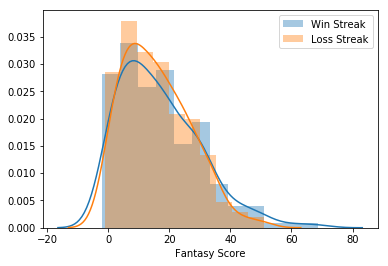

In [0]:
'''Checking for the players who have a win streak of greater than 6 and a losing streak of less than -6.'''
positive_stk_test = data[data['stk'] == 12]
negative_stk_test = data[data['stk'] == -12]

'''Creating a historgram to see the relationship between positive/negative streaks and fantasy points'''
sns.distplot(positive_stk_test['fantasy_score'], label = 'Win Streak')
sns.distplot(negative_stk_test['fantasy_score'], label = 'Loss Streak')
plt.xlabel("Fantasy Score")
plt.legend()

In [0]:
data

gmDate gmTime_x       playLNm    playFNm teamAbbr teamConf_x  \
0       2012-10-30    19:00         Price       A.J.      WAS       East   
3       2012-10-30    19:00         Ariza     Trevor      WAS       East   
6       2012-10-30    19:00        Okafor      Emeka      WAS       East   
9       2012-10-30    19:00          Beal    Bradley      WAS       East   
12      2012-10-30    19:00        Booker     Trevor      WAS       East   
15      2012-10-30    19:00      Crawford     Jordan      WAS       East   
18      2012-10-30    19:00       Webster    Martell      WAS       East   
21      2012-10-30    19:00        Vesely        Jan      WAS       East   
24      2012-10-30    19:00     Singleton      Chris      WAS       East   
27      2012-10-30    19:00        Barron       Earl      WAS       East   
30      2012-10-30    19:00         Pargo    Jannero      WAS       East   
33      2012-10-30    19:00       Varejao   Anderson      CLE       East   
36      2012-10-30    19:00        Irving      Kyrie      CLE       East   
39      2012-10-30    19:00           Gee     Alonzo      CLE       East   
42      2012-10-30    19:00      Thompson    Tristan      CLE       East   
45      2012-10-30    19:00       Waiters       Dion      CLE       East   
48      2012-10-30    19:00         Miles     Calvin      CLE       East   
51      2012-10-30    19:00        Gibson     Daniel      CLE       East   
54      2012-10-30    19:00        Zeller      Tyler      CLE       East   
57      2012-10-30    19:00         Sloan     Donald      CLE       East   
60      2012-10-30    19:00        Walton       Luke      CLE       East   
63      2012-10-30    20:00         Rondo      Rajon      BOS       East   
66      2012-10-30    20:00        Pierce       Paul      BOS       East   
69      2012-10-30    20:00       Garnett      Kevin      BOS       East   
72      2012-10-30    20:00          Bass    Brandon      BOS       East   
75      2012-10-30    20:00           Lee   Courtney      BOS       East   
78      2012-10-30    20:00         Terry      Jason      BOS       East   
81      2012-10-30    20:00         Green       Jeff      BOS       East   
84      2012-10-30    20:00       Barbosa    Leandro      BOS       East   
87      2012-10-30    20:00     Sullinger      Jared      BOS       East   
...            ...      ...           ...        ...      ...        ...   
465331  2018-04-11    10:30          Udoh       Ekpe      UTA       West   
465334  2018-04-11    10:30       Lillard     Damian      POR       West   
465337  2018-04-11    10:30      McCollum  Christian      POR       West   
465340  2018-04-11    10:30         Aminu  Al-Farouq      POR       West   
465343  2018-04-11    10:30        Nurkic      Jusuf      POR       West   
465346  2018-04-11    10:30        Turner       Evan      POR       West   
465349  2018-04-11    10:30       Collins       Zach      POR       West   
465352  2018-04-11    10:30         Davis     Edward      POR       West   
465355  2018-04-11    10:30   Connaughton    Patrick      POR       West   
465358  2018-04-11    10:30        Napier    Shabazz      POR       West   
465361  2018-04-11    10:30       Baldwin       Wade      POR       West   
465364  2018-04-11    10:30      Swanigan      Caleb      POR       West   
465367  2018-04-11    10:30        Layman       Jake      POR       West   
465370  2018-04-11    10:30         Black      Tarik      HOU       West   
465373  2018-04-11    10:30        Hunter     Ronald      HOU       West   
465376  2018-04-11    10:30       Johnson        Joe      HOU       West   
465379  2018-04-11    10:30        Tucker    Anthony      HOU       West   
465382  2018-04-11    10:30         Green     Gerald      HOU       West   
465385  2018-04-11    10:30       Jackson      Aaron      HOU       West   
465388  2018-04-11    10:30            Qi       Zhou      HOU       West   
465391  2018-04-11    10:30        Onuaku    Chinanu      HO

In [0]:
for col in ['playPTS', 'playAST', 'playTO', 'playSTL', 'playBLK', 'playFGA', 'playMin']:
  avg_last_x_games(data, col, 2)
  avg_last_x_games_team(data, col, 2)
  avg_last_x_games(data, col, 5)
  avg_last_x_games_team(data, col, 5)

Starting playPTS
Finished avgPlayPTS2
Starting playPTS
Finished avgPlayPTS2AgainstCurrOppt
Starting playPTS
Finished avgPlayPTS5
Starting playPTS
Finished avgPlayPTS5AgainstCurrOppt
Starting playAST
Finished avgPlayAST2
Starting playAST
Finished avgPlayAST2AgainstCurrOppt
Starting playAST
Finished avgPlayAST5
Starting playAST
Finished avgPlayAST5AgainstCurrOppt
Starting playTO
Finished avgPlayTO2
Starting playTO
Finished avgPlayTO2AgainstCurrOppt
Starting playTO
Finished avgPlayTO5
Starting playTO
Finished avgPlayTO5AgainstCurrOppt
Starting playSTL
Finished avgPlaySTL2
Starting playSTL
Finished avgPlaySTL2AgainstCurrOppt
Starting playSTL
Finished avgPlaySTL5
Starting playSTL
Finished avgPlaySTL5AgainstCurrOppt
Starting playBLK
Finished avgPlayBLK2
Starting playBLK
Finished avgPlayBLK2AgainstCurrOppt
Starting playBLK
Finished avgPlayBLK5
Starting playBLK
Finished avgPlayBLK5AgainstCurrOppt
Starting playFGA
Finished avgPlayFGA2
Starting playFGA
Finished avgPlayFGA2AgainstCurrOppt
Startin

In [0]:
def height_outliers(df):
  teams = {}
  teams_last_game = {}
  col = []
  for index, row in df.iterrows():
    if row['playHeight'] <= 69 or row['playHeight'] >= 87:
      col.append(1)
    else:
      col.append(0)
  df['heightOutlier'] = col
  
height_outliers(data)

# Imputing/Removing Values

In [0]:
'''Get rid of first games for the 2012 Season'''
data

gmDate gmTime_x       playLNm    playFNm teamAbbr teamConf_x  \
0       2012-10-30    19:00         Price       A.J.      WAS       East   
3       2012-10-30    19:00         Ariza     Trevor      WAS       East   
6       2012-10-30    19:00        Okafor      Emeka      WAS       East   
9       2012-10-30    19:00          Beal    Bradley      WAS       East   
12      2012-10-30    19:00        Booker     Trevor      WAS       East   
15      2012-10-30    19:00      Crawford     Jordan      WAS       East   
18      2012-10-30    19:00       Webster    Martell      WAS       East   
21      2012-10-30    19:00        Vesely        Jan      WAS       East   
24      2012-10-30    19:00     Singleton      Chris      WAS       East   
27      2012-10-30    19:00        Barron       Earl      WAS       East   
30      2012-10-30    19:00         Pargo    Jannero      WAS       East   
33      2012-10-30    19:00       Varejao   Anderson      CLE       East   
36      2012-10-30    19:00        Irving      Kyrie      CLE       East   
39      2012-10-30    19:00           Gee     Alonzo      CLE       East   
42      2012-10-30    19:00      Thompson    Tristan      CLE       East   
45      2012-10-30    19:00       Waiters       Dion      CLE       East   
48      2012-10-30    19:00         Miles     Calvin      CLE       East   
51      2012-10-30    19:00        Gibson     Daniel      CLE       East   
54      2012-10-30    19:00        Zeller      Tyler      CLE       East   
57      2012-10-30    19:00         Sloan     Donald      CLE       East   
60      2012-10-30    19:00        Walton       Luke      CLE       East   
63      2012-10-30    20:00         Rondo      Rajon      BOS       East   
66      2012-10-30    20:00        Pierce       Paul      BOS       East   
69      2012-10-30    20:00       Garnett      Kevin      BOS       East   
72      2012-10-30    20:00          Bass    Brandon      BOS       East   
75      2012-10-30    20:00           Lee   Courtney      BOS       East   
78      2012-10-30    20:00         Terry      Jason      BOS       East   
81      2012-10-30    20:00         Green       Jeff      BOS       East   
84      2012-10-30    20:00       Barbosa    Leandro      BOS       East   
87      2012-10-30    20:00     Sullinger      Jared      BOS       East   
...            ...      ...           ...        ...      ...        ...   
465331  2018-04-11    10:30          Udoh       Ekpe      UTA       West   
465334  2018-04-11    10:30       Lillard     Damian      POR       West   
465337  2018-04-11    10:30      McCollum  Christian      POR       West   
465340  2018-04-11    10:30         Aminu  Al-Farouq      POR       West   
465343  2018-04-11    10:30        Nurkic      Jusuf      POR       West   
465346  2018-04-11    10:30        Turner       Evan      POR       West   
465349  2018-04-11    10:30       Collins       Zach      POR       West   
465352  2018-04-11    10:30         Davis     Edward      POR       West   
465355  2018-04-11    10:30   Connaughton    Patrick      POR       West   
465358  2018-04-11    10:30        Napier    Shabazz      POR       West   
465361  2018-04-11    10:30       Baldwin       Wade      POR       West   
465364  2018-04-11    10:30      Swanigan      Caleb      POR       West   
465367  2018-04-11    10:30        Layman       Jake      POR       West   
465370  2018-04-11    10:30         Black      Tarik      HOU       West   
465373  2018-04-11    10:30        Hunter     Ronald      HOU       West   
465376  2018-04-11    10:30       Johnson        Joe      HOU       West   
465379  2018-04-11    10:30        Tucker    Anthony      HOU       West   
465382  2018-04-11    10:30         Green     Gerald      HOU       West   
465385  2018-04-11    10:30       Jackson      Aaron      HOU       West   
465388  2018-04-11    10:30            Qi       Zhou      HOU       West   
465391  2018-04-11    10:30        Onuaku    Chinanu      HO

#Linear Regression Model

In [0]:
features = ['home', 'starter', 'teamDayOff_x', 'opptDayOff_y', 'C', 'F', 'G', 'PF', 'SF', 'SG', 'avgPlayMin5', 'avgPlayPTS5', 'avgPlayAST5', 'avgPlayTO5', 'avgPlaySTL5', 'avgPlayBLK5', 
            'avgPlayMin5AgainstCurrOppt',	'avgPlayPTS5AgainstCurrOppt',	'avgPlayAST5AgainstCurrOppt',	'avgPlayTO5AgainstCurrOppt',	'avgPlaySTL5AgainstCurrOppt',	'avgPlayBLK5AgainstCurrOppt', 
            'avgPlayPTS2', 'avgPlayPTS2AgainstCurrOppt', 'avgPlayAST2', 'avgPlayAST2AgainstCurrOppt', 'avgPlayTO2', 'avgPlayTO2AgainstCurrOppt', 'avgPlaySTL2', 'avgPlaySTL2AgainstCurrOppt', 
            'avgPlayBLK2', 'avgPlayBLK2AgainstCurrOppt', 'avgPlayMin2', 'avgPlayMin2AgainstCurrOppt', 'avgPlayFGA5', 'avgPlayFGA5AgainstCurrOppt', 'avgPlayFGA2', 'avgPlayFGA2AgainstCurrOppt', 
            'heightOutlier', 'age', 'fantasy_score']
to_train = data[features]
to_train

home  starter  teamDayOff_x  opptDayOff_y  C  F  G  PF  SF  SG  \
0          1        1             0             0  0  0  0   0   0   0   
3          1        1             0             0  0  0  0   0   0   1   
6          1        1             0             0  1  0  0   0   0   0   
9          1        1             0             0  0  0  0   0   0   1   
12         1        1             0             0  0  0  0   1   0   0   
15         1        1             0             0  0  0  0   0   0   1   
18         1        1             0             0  0  0  0   0   0   1   
21         1        1             0             0  0  0  0   0   1   0   
24         1        1             0             0  0  0  0   0   1   0   
27         1        1             0             0  0  0  0   1   0   0   
30         1        1             0             0  0  0  0   0   0   0   
33         1        1             0             0  1  0  0   0   0   0   
36         1        1             0             0  0  0  0   0   0   0   
39         1        1             0             0  0  0  0   0   1   0   
42         1        1             0             0  0  0  0   0   1   0   
45         1        1             0             0  0  0  0   0   0   1   
48         1        1             0             0  0  0  0   0   1   0   
51         1        1             0             0  0  0  0   0   0   0   
54         1        1             0             0  1  0  0   0   0   0   
57         1        1             0             0  0  0  0   0   0   0   
60         1        1             0             0  0  0  0   0   1   0   
63         1        1             0             0  0  0  0   0   0   0   
66         1        1             0             0  0  0  0   0   1   0   
69         1        1             0             0  0  0  0   1   0   0   
72         1        1             0             0  0  0  0   1   0   0   
75         1        1             0             0  0  0  0   0   0   1   
78         1        1             0             0  0  0  0   0   0   1   
81         1        1             0             0  0  0  0   1   0   0   
84         1        1             0             0  0  0  0   0   0   1   
87         1        1             0             0  0  0  0   1   0   0   
...      ...      ...           ...           ... .. .. ..  ..  ..  ..   
465331     1        1             1             2  1  0  0   0   0   0   
465334     1        1             2             1  0  0  0   0   0   0   
465337     1        1             2             1  0  0  0   0   0   1   
465340     1        1             2             1  0  0  0   1   0   0   
465343     1        1             2             1  1  0  0   0   0   0   
465346     1        1             2             1  0  0  0   0   1   0   
465349     1        1             2             1  1  0  0   0   0   0   
465352     1        1             2             1  0  0  0   1   0   0   
465355     1        1             2             1  0  0  0   0   0   1   
465358     1        1             2             1  0  0  0   0   0   0   
465361     1        1             2             1  0  0  0   0   0   0   
465364     1        1             2             1  0  0  0   1   0   0   
465367     1        1             2             1  0  0  0   0   1   0   
465370     1        1             1             2  0  0  0   1   0   0   
465373     1        1             1             2  0  0  0   0   0   1   
465376     1        1             1             2  0  0  0   0   0   1   
465379     1        1             1             2  0  0  0   0   1   0   
465382     1        1             1             2  0  0  0   0   0   1   
465385     1        1             1             2  0  1  0   0   0   0   
465388     1        1             1             2  0  0  0   1   0   0   
465391     1        1             1             2  1  0  0   0   0   0   
465394     1        1             2             1  0  0  0   0   0   1   
465397     1

In [0]:
# some preprocessing
#to_train = to_train.reset_index().drop(['index'],1)


from sklearn.model_selection import train_test_split
from sklearn.linear_model import RidgeCV

# splitting the to_train into the training data and targets 
train = to_train.iloc[:,:-1]
target = to_train.iloc[:,-1:]

# setting aside .05 as the final test split
X_train, X_test, y_train, y_test = train_test_split(train, target,test_size=.05,random_state=42)

# setting asdie .1 of the .95 of full dataset to validate 
X_train, X_val, y_train, y_val = train_test_split(train, target,test_size=.1,random_state=42)

X_train.head()

home  starter  teamDayOff_x  opptDayOff_y  C  F  G  PF  SF  SG  \
149310     1        1             2             2  0  0  0   0   0   0   
253176     1        1             2             2  0  0  0   0   0   1   
276384     1        1             2             3  1  0  0   0   0   0   
359727     1        1             1             2  0  0  0   0   0   0   
371469     1        1             1             1  0  0  0   0   0   0   

        avgPlayMin5  avgPlayPTS5  avgPlayAST5  avgPlayTO5  avgPlaySTL5  \
149310         37.0          8.8          3.6         0.8          1.2   
253176         22.6          6.4          0.4         0.8          0.4   
276384         22.4         14.0          2.0         1.2          0.8   
359727         31.0         11.0          5.0         2.2          1.6   
371469         28.8          7.8          4.6         2.0          0.4   

        avgPlayBLK5  avgPlayMin5AgainstCurrOppt  avgPlayPTS5AgainstCurrOppt  \
149310          0.2                        32.4                        10.8   
253176          0.0                        30.0                        18.4   
276384          0.4                        21.4                         9.4   
359727          0.0                        24.5                         9.5   
371469          0.0                        24.8                         6.2   

        avgPlayAST5AgainstCurrOppt  avgPlayTO5AgainstCurrOppt  \
149310                        5.40                       0.80   
253176                        2.00                       1.20   
276384                        0.60                       0.60   
359727                        3.25                       1.75   
371469                        5.80                       1.40   

        avgPlaySTL5AgainstCurrOppt  avgPlayBLK5AgainstCurrOppt  avgPlayPTS2  \
149310                        0.60                        0.00         10.0   
253176                        0.40                        0.00          5.5   
276384                        0.60                        0.40         15.0   
359727                        1.25                        0.25         11.5   
371469                        1.40                        0.00          6.5   

        avgPlayPTS2AgainstCurrOppt  avgPlayAST2  avgPlayAST2AgainstCurrOppt  \
149310                         7.0          3.5                         7.0   
253176                        14.5          1.0                         0.0   
276384                         8.0          2.5                         0.0   
359727                        11.5          2.5                         5.0   
371469                         9.0          5.5                         6.0   

        avgPlayTO2  avgPlayTO2AgainstCurrOppt  avgPlaySTL2  \
149310         0.5                        0.5          1.0   
253176         0.5                        1.5          0.5   
276384         1.0                        1.0          0.5   
359727         2.0                        3.0          0.5   
371469         2.5                        0.5          0.5   

        avgPlaySTL2AgainstCurrOppt  avgPlayBLK2  avgPlayBLK2AgainstCurrOppt  \
149310                         0.5          0.0                         0.0   
253176                         0.0          0.0                         0.0   
276384                         0.5          0.0                         0.0   
359727                         1.5          0.0                         0.5   
371469                         3.0          0.0                         0.0   

        avgPlayMin2  avgPlayMin2AgainstCurrOppt  avgPlayFGA5  \
149310         37.0                        31.0          7.0   
253176         19.0                        27.5          5.8   
276384         19.5                        18.5          9.6   
359727         29.0                        33.5         10.0   
371469         27.5                        29.5          7.0   

        avgPlayFGA5AgainstCurrOppt  avgPlayFGA2  avgPlayFGA2AgainstCu

**Trying Vanilla Linear Regression**

In [0]:
%%time

from sklearn.linear_model import LinearRegression
rmse = lambda x,y: np.sqrt(np.mean((x - y)**2))
linreg = LinearRegression(fit_intercept =True)
linreg.fit(X_train,y_train)
print(linreg.score(X_val,y_val))

print("Train Error:", rmse(linreg.predict(X_train), y_train))
print("Validation Error:", rmse(linreg.predict(X_val), y_val))

0.4754282257328267
Train Error: fantasy_score    8.549655
dtype: float64
Validation Error: fantasy_score    8.612638
dtype: float64
CPU times: user 377 ms, sys: 59.5 ms, total: 436 ms
Wall time: 292 ms


Text(0.5, 1.0, 'True vs predicted points distribution')

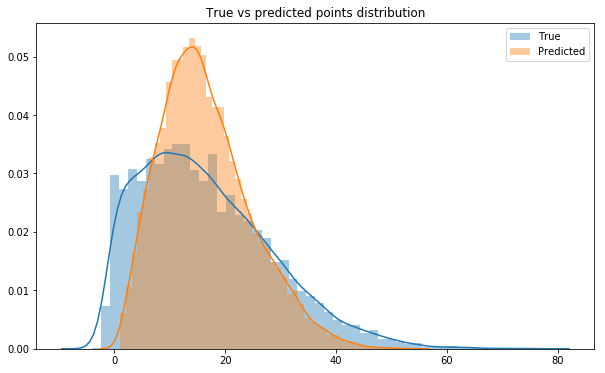

In [0]:
plt.figure(figsize=(10,6))
sns.distplot(y_val,label='True')
sns.distplot(linreg.predict(X_val), label='Predicted')
plt.legend()
plt.title('True vs predicted points distribution')

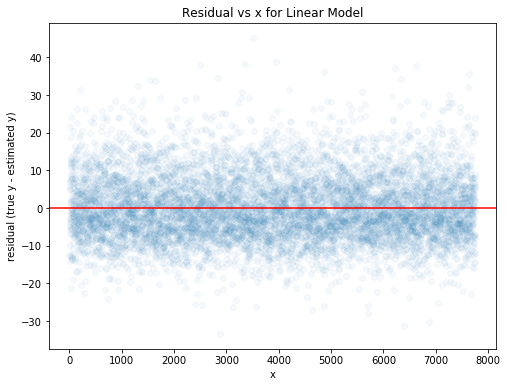

In [0]:
plt.figure(figsize=(8,6))      
plt.scatter(np.arange(len(X_test)), y_test - linreg.predict(X_test), alpha=.04)
plt.xlabel('x')
plt.ylabel('residual (true y - estimated y)')
plt.title('Residual vs x for Linear Model')
plt.axhline(y = 0, color='r')

**Trying rIdge CV**

In [0]:
# # Ridge CV

# #hyperparameters to test 
# a = np.arange(1e-3,1,.05)

# ridge = RidgeCV(alphas=a,fit_intercept=True, store_cv_values=True)
# ridge.fit(X_train,y_train)

# train_pred = ridge.predict(X_train)
# val_pred = ridge.predict(X_val)


# train_acc = rmse(train_pred, y_train)
# val_acc = rmse(val_pred, y_val)

# print(train_acc, val_acc)




fantasy_score    8.593433
dtype: float64 fantasy_score    8.648519
dtype: float64


In [0]:
# plt.figure(figsize=(10,6))
# sns.distplot(y_val,label='True Train')
# sns.distplot(val_pred, label ='Predicted Train')
# plt.legend()
# plt.title('True vs predicted training points distribution')

In [0]:
# plt.figure(figsize=(8,6))      
# plt.scatter(np.arange(len(X_test)), y_test - ridge.predict(X_test), alpha=.5)
# plt.xlabel('x')
# plt.ylabel('residual (true y - estimated y)')
# plt.title('Residual vs x for Linear Model')
# plt.axhline(y = 0, color='r')

In [0]:
# full_name = data['playFNm'] + ' ' + data['playLNm']
# full_name

In [0]:
# to_export = pd.DataFrame(data=[data['gmDate'], full_name, train_pred])

## RandomForrestModel

In [0]:

from sklearn.model_selection import train_test_split
#features = ['home', 'starter', 'teamDayOff_x', 'avgPlayMin', 'C', 'F', 'G', 'PF', 'SF', 'SG', 'avgPlayMin', 'avgPlayPTS', 'avgPlayAST', 'avgPlayTO', 'avgPlaySTL', 'avgPlayBLK', 'age', 'fantasy_score']
to_train = data[features]
# some preprocessing
#to_train = to_train.reset_index().drop(['index'],1)

# splitting the to_train into the training data and targets 
train = to_train.iloc[:,:-1]
target = to_train.iloc[:,-1:]

# setting aside .05 as the final test split
X_train, X_test, y_train, y_test = train_test_split(train, target,test_size=.05,random_state=42)

# setting asdie .1 of the .95 of full dataset to validate 
X_train, X_val, y_train, y_val = train_test_split(train, target,test_size=.1,random_state=42)

X_train.head()

home  starter  teamDayOff_x  opptDayOff_y  C  F  G  PF  SF  SG  \
149310     1        1             2             2  0  0  0   0   0   0   
253176     1        1             2             2  0  0  0   0   0   1   
276384     1        1             2             3  1  0  0   0   0   0   
359727     1        1             1             2  0  0  0   0   0   0   
371469     1        1             1             1  0  0  0   0   0   0   

        avgPlayMin5  avgPlayPTS5  avgPlayAST5  avgPlayTO5  avgPlaySTL5  \
149310         37.0          8.8          3.6         0.8          1.2   
253176         22.6          6.4          0.4         0.8          0.4   
276384         22.4         14.0          2.0         1.2          0.8   
359727         31.0         11.0          5.0         2.2          1.6   
371469         28.8          7.8          4.6         2.0          0.4   

        avgPlayBLK5  avgPlayMin5AgainstCurrOppt  avgPlayPTS5AgainstCurrOppt  \
149310          0.2                        32.4                        10.8   
253176          0.0                        30.0                        18.4   
276384          0.4                        21.4                         9.4   
359727          0.0                        24.5                         9.5   
371469          0.0                        24.8                         6.2   

        avgPlayAST5AgainstCurrOppt  avgPlayTO5AgainstCurrOppt  \
149310                        5.40                       0.80   
253176                        2.00                       1.20   
276384                        0.60                       0.60   
359727                        3.25                       1.75   
371469                        5.80                       1.40   

        avgPlaySTL5AgainstCurrOppt  avgPlayBLK5AgainstCurrOppt  avgPlayPTS2  \
149310                        0.60                        0.00         10.0   
253176                        0.40                        0.00          5.5   
276384                        0.60                        0.40         15.0   
359727                        1.25                        0.25         11.5   
371469                        1.40                        0.00          6.5   

        avgPlayPTS2AgainstCurrOppt  avgPlayAST2  avgPlayAST2AgainstCurrOppt  \
149310                         7.0          3.5                         7.0   
253176                        14.5          1.0                         0.0   
276384                         8.0          2.5                         0.0   
359727                        11.5          2.5                         5.0   
371469                         9.0          5.5                         6.0   

        avgPlayTO2  avgPlayTO2AgainstCurrOppt  avgPlaySTL2  \
149310         0.5                        0.5          1.0   
253176         0.5                        1.5          0.5   
276384         1.0                        1.0          0.5   
359727         2.0                        3.0          0.5   
371469         2.5                        0.5          0.5   

        avgPlaySTL2AgainstCurrOppt  avgPlayBLK2  avgPlayBLK2AgainstCurrOppt  \
149310                         0.5          0.0                         0.0   
253176                         0.0          0.0                         0.0   
276384                         0.5          0.0                         0.0   
359727                         1.5          0.0                         0.5   
371469                         3.0          0.0                         0.0   

        avgPlayMin2  avgPlayMin2AgainstCurrOppt  avgPlayFGA5  \
149310         37.0                        31.0          7.0   
253176         19.0                        27.5          5.8   
276384         19.5                        18.5          9.6   
359727         29.0                        33.5         10.0   
371469         27.5                        29.5          7.0   

        avgPlayFGA5AgainstCurrOppt  avgPlayFGA2  avgPlayFGA2AgainstCu

In [0]:
%%time

from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error

forrest = RandomForestRegressor(n_estimators=75, 
                                max_features='auto', 
                                random_state=42)

forrest.fit(X_train,y_train)


#train mse
pred_t = forrest.predict(X_train)
train_acc = np.sqrt(mean_squared_error(pred_t, y_train))

#val 
pred_v = forrest.predict(X_val)
val_acc = np.sqrt(mean_squared_error(pred_v, y_val))

print(f'Train: {train_acc}')
print(f'Validation: {val_acc}')

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  # Remove the CWD from sys.path while we load stuff.


Train: 3.2853033840998185
Validation: 8.612385494958033
CPU times: user 3min, sys: 381 ms, total: 3min
Wall time: 3min


Text(0.5, 1.0, 'True vs predicted')

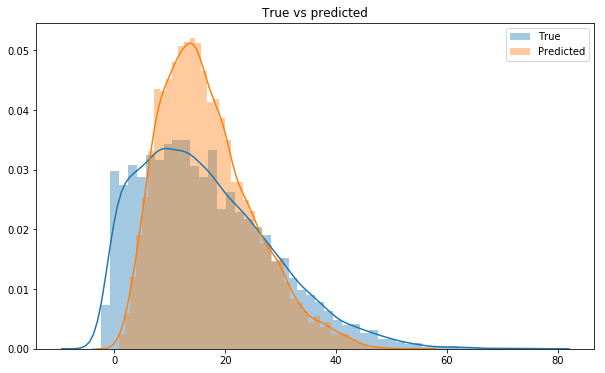

In [0]:
plt.figure(figsize=(10,6))
sns.distplot(y_val,label='True')
sns.distplot(pred_v, label ='Predicted')
plt.legend()
plt.title('True vs predicted')

In [0]:
# parameters = {'n_estimators':[10,20,30,50,70,100,150,],
#               'matx_depth':[5,10,15,20,25,50], 'min_samples_leaf':[1,25,50,75,100]}

In [0]:
# y_train_pred = forrest.predict(X_val)
# # rmse(y_train_pred, y_train)

In [0]:
# dfrom sklearn.model_selection import cross_val_predict
# cross_val_score(forrest, X_train, y_train, cv=10, scoring='neg_mean_absolute_error')

## Grid Search

Dont run, it takes too long.

In [0]:
# params = { 
#           'max_features':['auto','sqrt'],
#           'max_depth': [5, 15],
#            'min_samples_split':[2,50],
#           'max_leaf_nodes':[10,50],
# }

# grid_forrest = GridSearchCV(estimator=RandomForestRegressor(n_estimators=250), 
#                     param_grid=params, 
#                     cv=4)

# start = time.time()
# grid_forrest.fit(X_train,y_train)
# print(f'{((time.time() - start) / 60)} minutes to fit')

## Nueral Net 

In [0]:

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Dense
from tensorflow.python.keras.wrappers.scikit_learn import KerasRegressor


In [0]:
to_train = data[features]
to_train.head()

home  starter  teamDayOff_x  opptDayOff_y  C  F  G  PF  SF  SG  \
0      1        1             0             0  0  0  0   0   0   0   
3      1        1             0             0  0  0  0   0   0   1   
6      1        1             0             0  1  0  0   0   0   0   
9      1        1             0             0  0  0  0   0   0   1   
12     1        1             0             0  0  0  0   1   0   0   

    avgPlayMin5  avgPlayPTS5  avgPlayAST5  avgPlayTO5  avgPlaySTL5  \
0           0.0          0.0          0.0         0.0          0.0   
3           0.0          0.0          0.0         0.0          0.0   
6           0.0          0.0          0.0         0.0          0.0   
9           0.0          0.0          0.0         0.0          0.0   
12          0.0          0.0          0.0         0.0          0.0   

    avgPlayBLK5  avgPlayMin5AgainstCurrOppt  avgPlayPTS5AgainstCurrOppt  \
0           0.0                         0.0                         0.0   
3           0.0                         0.0                         0.0   
6           0.0                         0.0                         0.0   
9           0.0                         0.0                         0.0   
12          0.0                         0.0                         0.0   

    avgPlayAST5AgainstCurrOppt  avgPlayTO5AgainstCurrOppt  \
0                          0.0                        0.0   
3                          0.0                        0.0   
6                          0.0                        0.0   
9                          0.0                        0.0   
12                         0.0                        0.0   

    avgPlaySTL5AgainstCurrOppt  avgPlayBLK5AgainstCurrOppt  avgPlayPTS2  \
0                          0.0                         0.0          0.0   
3                          0.0                         0.0          0.0   
6                          0.0                         0.0          0.0   
9                          0.0                         0.0          0.0   
12                         0.0                         0.0          0.0   

    avgPlayPTS2AgainstCurrOppt  avgPlayAST2  avgPlayAST2AgainstCurrOppt  \
0                          0.0          0.0                         0.0   
3                          0.0          0.0                         0.0   
6                          0.0          0.0                         0.0   
9                          0.0          0.0                         0.0   
12                         0.0          0.0                         0.0   

    avgPlayTO2  avgPlayTO2AgainstCurrOppt  avgPlaySTL2  \
0          0.0                        0.0          0.0   
3          0.0                        0.0          0.0   
6          0.0                        0.0          0.0   
9          0.0                        0.0          0.0   
12         0.0                        0.0          0.0   

    avgPlaySTL2AgainstCurrOppt  avgPlayBLK2  avgPlayBLK2AgainstCurrOppt  \
0                          0.0          0.0                         0.0   
3                          0.0          0.0                         0.0   
6                          0.0          0.0                         0.0   
9                          0.0          0.0                         0.0   
12                         0.0          0.0                         0.0   

    avgPlayMin2  avgPlayMin2AgainstCurrOppt  avgPlayFGA5  \
0           0.0                         0.0          0.0   
3           0.0                         0.0          0.0   
6           0.0                         0.0          0.0   
9           0.0                         0.0          0.0   
12          0.0                         0.0          0.0   

    avgPlayFGA5AgainstCurrOppt  avgPlayFGA2  avgPlayFGA2AgainstCurrOppt  \
0                          0.0          0.0                         0.0   
3                          0.0          0.0                         0.0   
6                          0.0          0.0             

In [0]:


# splitting the to_train into the training data and targets 
train = to_train.iloc[:,:-1]
target = to_train.iloc[:,-1:]

scaler = MinMaxScaler()

print(scaler.fit(train))
print(scaler.fit(target))
xscale=scaler.transform(train)
yscale=scaler.transform(target)

X_train, X_test, y_train, y_test = train_test_split(xscale, yscale)

MinMaxScaler(copy=True, feature_range=(0, 1))
MinMaxScaler(copy=True, feature_range=(0, 1))


/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/data.py:334: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


In [0]:
num_feats = X_train.shape[1]
print(num_feats)

40


In [0]:

model = Sequential()
model.add(Dense(16, input_dim=num_feats, kernel_initializer='normal', activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(1, activation='linear'))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_10 (Dense)             (None, 16)                656       
_________________________________________________________________
dense_11 (Dense)             (None, 16)                272       
_________________________________________________________________
dense_12 (Dense)             (None, 16)                272       
_________________________________________________________________
dense_13 (Dense)             (None, 16)                272       
_________________________________________________________________
dense_14 (Dense)             (None, 1)                 17        
Total params: 1,489
Trainable params: 1,489
Non-trainable params: 0
_________________________________________________________________


In [0]:
from keras import backend as K

def root_mean_squared_error(y_true, y_pred):
        return K.sqrt(K.mean(K.square(y_pred - y_true))) 


model.compile(loss=root_mean_squared_error, optimizer='adam')

In [0]:
%%time
history = model.fit(X_train, y_train, 
                    epochs=50, batch_size=1000,  
                    verbose=1, validation_split=0.2)

Train on 93067 samples, validate on 23267 samples
Epoch 1/50
93067/93067 [==============================] - 1s 8us/sample - loss: 0.1400 - val_loss: 0.1110
Epoch 2/50
93067/93067 [==============================] - 0s 4us/sample - loss: 0.1028 - val_loss: 0.0966
Epoch 3/50
93067/93067 [==============================] - 0s 4us/sample - loss: 0.0950 - val_loss: 0.0947
Epoch 4/50
93067/93067 [==============================] - 0s 4us/sample - loss: 0.0942 - val_loss: 0.0941
Epoch 5/50
93067/93067 [==============================] - 0s 4us/sample - loss: 0.0939 - val_loss: 0.0938
Epoch 6/50
93067/93067 [==============================] - 0s 4us/sample - loss: 0.0935 - val_loss: 0.0935
Epoch 7/50
93067/93067 [==============================] - 0s 4us/sample - loss: 0.0934 - val_loss: 0.0933
Epoch 8/50
93067/93067 [==============================] - 0s 4us/sample - loss: 0.0932 - val_loss: 0.0931
Epoch 9/50
93067/93067 [==============================] - 0s 4us/sample - loss: 0.0931 - val_loss: 0.0

NameError: ignored

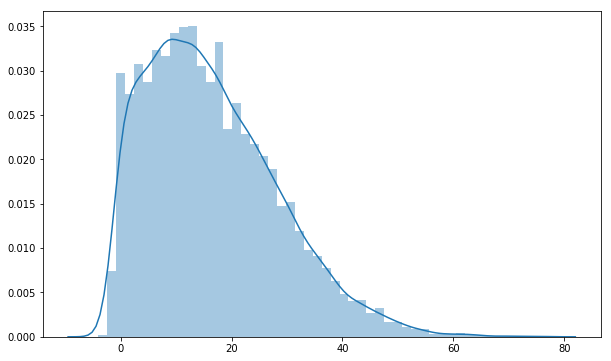

In [0]:
plt.figure(figsize=(10,6))
sns.distplot(y_val,label='True')
sns.distplot(val_pred, label ='Predicted')
plt.legend()
plt.title('True vs predicted')

dict_keys(['loss', 'val_loss'])


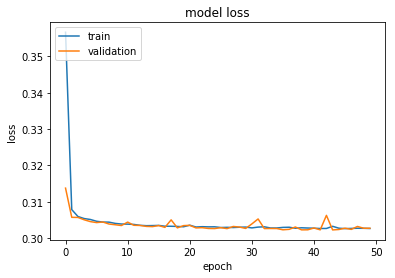

In [0]:
print(history.history.keys())
# "Loss"
plt.plot(np.sqrt(history.history['loss']))
plt.plot(np.sqrt(history.history['val_loss']))
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()


In [0]:

jan_31 = train.loc[data[data['gmDate'] == '2018-01-31'].index, :]
names = data[data['gmDate'] == '2018-01-31']['playDispNm']
true_labels = [elem[0] for elem in target.loc[data[data['gmDate'] == '2018-01-31'].index, :].values]
predicted_labels = [elem[0] for elem in model.predict(jan_31)]


to_export = pd.DataFrame(data=[names.values, predicted_labels, true_labels]).T
to_export.columns = ['Name', 'Predicted Points', 'True Points']
to_export = to_export.sort_values('Predicted Points', ascending=False)

In [0]:
to_export.loc[:, ['Name', 'Predicted Points']].to_html()


'<table border="1" class="dataframe">\n  <thead>\n    <tr style="text-align: right;">\n      <th></th>\n      <th>Name</th>\n      <th>Predicted Points</th>\n    </tr>\n  </thead>\n  <tbody>\n    <tr>\n      <th>97</th>\n      <td>LeBron James</td>\n      <td>36.223</td>\n    </tr>\n    <tr>\n      <th>143</th>\n      <td>Damian Lillard</td>\n      <td>32.6021</td>\n    </tr>\n    <tr>\n      <th>42</th>\n      <td>Kemba Walker</td>\n      <td>32.2374</td>\n    </tr>\n    <tr>\n      <th>44</th>\n      <td>Dwight Howard</td>\n      <td>29.6044</td>\n    </tr>\n    <tr>\n      <th>10</th>\n      <td>Victor Oladipo</td>\n      <td>28.0492</td>\n    </tr>\n    <tr>\n      <th>166</th>\n      <td>Devin Booker</td>\n      <td>28.0081</td>\n    </tr>\n    <tr>\n      <th>1</th>\n      <td>Marc Gasol</td>\n      <td>27.8697</td>\n    </tr>\n    <tr>\n      <th>68</th>\n      <td>Joel Embiid</td>\n      <td>26.0506</td>\n    </tr>\n    <tr>\n      <th>54</th>\n      <td>Dennis Schröder</td>\n 

In [0]:
pd.options.display.max_rows = 999
to_export[['Name']]

Name
97               LeBron James
143            Damian Lillard
42               Kemba Walker
44              Dwight Howard
10             Victor Oladipo
166              Devin Booker
1                  Marc Gasol
68                Joel Embiid
54            Dennis Schröder
144             C.J. McCollum
98              Isaiah Thomas
26            Jordan Clarkson
88            Josh Richardson
67                Ben Simmons
107        Kristaps Porziņģis
165               T.J. Warren
124                Al Horford
157              Dennis Smith
110               Enes Kanter
33              Elfrid Payton
156           Harrison Barnes
70           Robert Covington
19             Brandon Ingram
12            Darren Collison
43              Nicolas Batum
32              Evan Fournier
9              Thaddeus Young
55              Kent Bazemore
109          Tim Hardaway Jr.
21              Julius Randle
89               Goran Dragić
78          Spencer Dinwiddie
91              James Johnson
71                J.J. Redick
69                Dario Saric
133              Jerian Grant
155           Wesley Matthews
92           Hassan Whiteside
15           Domantas Sabonis
147              Jusuf Nurkic
102               Dwyane Wade
108              Courtney Lee
77            DeMarre Carroll
34           Jonathon Simmons
134               Zach LaVine
93            Wayne Ellington
132               Robin Lopez
2               Jarell Martin
137          Denzel Valentine
122              Jaylen Brown
160              Yogi Ferrell
121              Jayson Tatum
131            Justin Holiday
116           Michael Beasley
23                Brook Lopez
16           Lance Stephenson
151                  Ed Davis
76    Timothé Luwawu-Cabarrot
24                 Kyle Kuzma
13               Myles Turner
95               Kelly Olynyk
127             Marcus Morris
4             Andrew Harrison
136              Bobby Portis
90              Tyler Johnson
20   Kentavious Caldwell-Pope
3                Wayne Selden
146           Al-Farouq Aminu
145               Evan Turner
0               Dillon Brooks
57             Taurean Prince
64            Malcolm Delaney
111              Jarrett Jack
120              Terry Rozier
72             T.J. McConnell
168              Josh Jackson
25            Larry Nance Jr.
159             Dirk Nowitzki
84           D'Angelo Russell
48                Jeremy Lamb
94            Justise Winslow
100               Jae Crowder
56             Ersan Ilyasova
39              D.J. Augustin
31            Bismack Biyombo
167           Marquese Chriss
14                Cory Joseph
119                Trey Burke
73            Justin Anderson
46     Michael Kidd-Gilchrist
99                 J.R. Smith
61               John Collins
82                 Joe Harris
79               Allen Crabbe
45             Frank Kaminsky
36              Mario Hezonja
96                Bam Adebayo
175             Isaiah Canaan
27                Alex Caruso
37               Shelvin Mack
11           Bojan Bogdanović
59            Marco Belinelli
60             Dewayne Dedmon
174                Tyler Ulis
149            Shabazz Napier
162               Maxi Kleber
171              Troy Daniels
81              Jarrett Allen
150           Pat Connaughton
85              Jahlil Okafor
101          Tristan Thompson
158             Dwight Powell
128              Daniel Theis
106              Derrick Rose
83               Nik Stauskas
104             Channing Frye
117              Kyle O'Quinn
112           Frank Ntilikina
164               Salah Mejri
62               Mike Muscala
170             Dragan Bender
80                 Quincy Acy
148              Zach Collins
105               Kyle Korver
6                   Ivan Rabb
169            Tyson Chandler
172              Jared Dudley
50    Michael Carter-Williams
140               David Nwaba
103                Jeff Green
5                  Myke Henry
28               Corey Brewer
161              Devin Harris
22   

In [0]:
salary_dict = {'LeBron James': 35.65,
              'Damian Lillard': 24.33,
              'Kemba Walker': 12.00,
              'Dwight Howard': 23.18,
              'Victor Oladipo': 21.00,
              'Devin Booker': 3.313,
              'Marc Gasol': 19.69,
              'Joel Embiid': 6.1,
              'Dennis Schröder': 2.7,
              'C.J. McCollum': 25.76,
              'Isaiah Thomas': 6.26,
              'Jordan Clarkson': 12.5,
              'Josh Richardson': .52,
              'Ben Simmons': 5.9,
              'Kristaps Porziņģis': 4.13,
              'Al Horford': 26.54,
              'Dennis Smith': 3.83,
              'Enes Kanter': 17.5,
              'Elfrid Payton': 3.0,
              'Harrison Barnes': 23.11,
              'Robert Covington': .816,
              'Brandon Ingram': 5.28,
              'Darren Collison': 1.98,
              'Isaiah Canaan': 1.16,
               'Tyler Ulis':.543,
               'Danuel House':.543,
               'Jared Dudley': 10.47,
               'Troy Daniels':3.19,
               'Dragan Bender':4.276,
               'Tyson Chandler':2.11,
               'Josh Jackson':6.041,
               'Marquese Chriss': 2.941,
                'Devin Booker': 3.314,
                'T.J. Warren': 3.153,
                'Salah Mejri': .525093,
                'Kyle Collinsworth': .543,
                'Maxi Kleber': 1.378,
                'Devin Harris': 9.94,
                 'Yogi Ferrell': 3.075,
                'Dirk Nowitzki': 5,
                'Dwight Powell':8.3,
                'Dennis Smith':3.83,
                'Harrison Barnes': 23.11,
                'Wesley Matthews':16.41,
                'Jake Layman': .6,
                'Noah Vonleh':2.6,
                'Moe Harkless': 8.99,
                 'Ed Davis': 6.98,
                'Pat Connaughton':.625,
                'Shabazz Napier':1.35,
                'Zach Collins':3.628,
                'Jusuf Nurkic':1.921,
                'Al-Farouq Aminu':8.04,
                'Evan Turner':16.39,
                 'C.J. McCollum':25.7,
                 'Antonio Blakeney':1.46}
  
keys = salary_dict.keys()
new_df = to_export[to_export['Name'].isin(keys)]
new_df['Salary'] = salary_dict.values()
new_df.drop('True Points', axis=1).to_html()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:60: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


'<table border="1" class="dataframe">\n  <thead>\n    <tr style="text-align: right;">\n      <th></th>\n      <th>Name</th>\n      <th>Predicted Points</th>\n      <th>Salary</th>\n    </tr>\n  </thead>\n  <tbody>\n    <tr>\n      <th>97</th>\n      <td>LeBron James</td>\n      <td>36.223</td>\n      <td>35.650000</td>\n    </tr>\n    <tr>\n      <th>143</th>\n      <td>Damian Lillard</td>\n      <td>32.6021</td>\n      <td>24.330000</td>\n    </tr>\n    <tr>\n      <th>42</th>\n      <td>Kemba Walker</td>\n      <td>32.2374</td>\n      <td>12.000000</td>\n    </tr>\n    <tr>\n      <th>44</th>\n      <td>Dwight Howard</td>\n      <td>29.6044</td>\n      <td>23.180000</td>\n    </tr>\n    <tr>\n      <th>10</th>\n      <td>Victor Oladipo</td>\n      <td>28.0492</td>\n      <td>21.000000</td>\n    </tr>\n    <tr>\n      <th>166</th>\n      <td>Devin Booker</td>\n      <td>28.0081</td>\n      <td>3.314000</td>\n    </tr>\n    <tr>\n      <th>1</th>\n      <td>Marc Gasol</td>\n      <td>2

In [0]:
def printknapSack(W, wt, val, n): 
    K = [[0 for w in range(W + 1)] 
            for i in range(n + 1)] 
              
    # Build table K[][] in bottom 
    # up manner 
    for i in range(n + 1): 
        for w in range(W + 1): 
            if i == 0 or w == 0: 
                K[int(i)][int(w)] = 0
            elif wt[i - 1] <= w:
                K[int(i)][int(w)] = max(val[int(i) - 1] + K[int(i) - 1][int(w) - wt[int(i) - 1]], K[int(i) - 1][int(w)]) 
            else: 
                K[int(i)][int(w)] = K[int(i) - 1][int(w)] 
  
    # stores the result of Knapsack 
    res = K[int(n)][int(W)] 
    print(res) 
      
    w = W 
    for i in range(n, 0, -1): 
        if res <= 0: 
            break
        # either the result comes from the 
        # top (K[i-1][w]) or from (val[i-1] 
        # + K[i-1] [w-wt[i-1]]) as in Knapsack 
        # table. If it comes from the latter 
        # one/ it means the item is included. 
        if res == K[i - 1][w]: 
            continue
        else: 
  
            # This item is included. 
            print(wt[i - 1]) 
              
            # Since this weight is included 
            # its value is deducted 
            res = res - val[i - 1] 
            w = w - wt[i - 1]
            
printknapSack(60, list(new_df['Salary']), list(new_df['Predicted Points']), len(new_df['Predicted Points']))

TypeError: ignored

## XGboost





In [0]:
import xgboost as xgb
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
to_train = data[features]
# some preprocessing
to_train = to_train.reset_index().drop(['index'],1)
to_train = to_train.loc[:,~to_train.columns.duplicated()]

# splitting the to_train into the training data and targets 
train = to_train.iloc[:,:-1]
target = to_train.iloc[:,-1:]

# setting aside .05 as the final test split
X_train, X_test, y_train, y_test = train_test_split(train, target,test_size=.05,random_state=42)

# setting asdie .1 of the .95 of full dataset to validate 
X_train, X_val, y_train, y_val = train_test_split(train, target,test_size=.1,random_state=42)

X_train.head()

home  starter  teamDayOff_x  opptDayOff_y  C  F  G  PF  SF  SG  \
49770      1        1             2             2  0  0  0   0   0   0   
84378      1        1             2             2  0  0  0   0   0   1   
92114      1        1             2             3  1  0  0   0   0   0   
119895     1        1             1             2  0  0  0   0   0   0   
123809     1        1             1             1  0  0  0   0   0   0   

        avgPlayMin5  avgPlayPTS5  avgPlayAST5  avgPlayTO5  avgPlaySTL5  \
49770          37.0          8.8          3.6         0.8          1.2   
84378          22.6          6.4          0.4         0.8          0.4   
92114          22.4         14.0          2.0         1.2          0.8   
119895         31.0         11.0          5.0         2.2          1.6   
123809         28.8          7.8          4.6         2.0          0.4   

        avgPlayBLK5  avgPlayMin5AgainstCurrOppt  avgPlayPTS5AgainstCurrOppt  \
49770           0.2                        32.4                        10.8   
84378           0.0                        30.0                        18.4   
92114           0.4                        21.4                         9.4   
119895          0.0                        24.5                         9.5   
123809          0.0                        24.8                         6.2   

        avgPlayAST5AgainstCurrOppt  avgPlayTO5AgainstCurrOppt  \
49770                         5.40                       0.80   
84378                         2.00                       1.20   
92114                         0.60                       0.60   
119895                        3.25                       1.75   
123809                        5.80                       1.40   

        avgPlaySTL5AgainstCurrOppt  avgPlayBLK5AgainstCurrOppt  avgPlayPTS2  \
49770                         0.60                        0.00         10.0   
84378                         0.40                        0.00          5.5   
92114                         0.60                        0.40         15.0   
119895                        1.25                        0.25         11.5   
123809                        1.40                        0.00          6.5   

        avgPlayPTS2AgainstCurrOppt  avgPlayAST2  avgPlayAST2AgainstCurrOppt  \
49770                          7.0          3.5                         7.0   
84378                         14.5          1.0                         0.0   
92114                          8.0          2.5                         0.0   
119895                        11.5          2.5                         5.0   
123809                         9.0          5.5                         6.0   

        avgPlayTO2  avgPlayTO2AgainstCurrOppt  avgPlaySTL2  \
49770          0.5                        0.5          1.0   
84378          0.5                        1.5          0.5   
92114          1.0                        1.0          0.5   
119895         2.0                        3.0          0.5   
123809         2.5                        0.5          0.5   

        avgPlaySTL2AgainstCurrOppt  avgPlayBLK2  avgPlayBLK2AgainstCurrOppt  \
49770                          0.5          0.0                         0.0   
84378                          0.0          0.0                         0.0   
92114                          0.5          0.0                         0.0   
119895                         1.5          0.0                         0.5   
123809                         3.0          0.0                         0.0   

        avgPlayMin2  avgPlayMin2AgainstCurrOppt  avgPlayFGA5  \
49770          37.0                        31.0          7.0   
84378          19.0                        27.5          5.8   
92114          19.5                        18.5          9.6   
119895         29.0                        33.5         10.0   
123809         27.5                        29.5          7.0   

        avgPlayFGA5AgainstCurrOppt  avgPlayFGA2  avgPlayFGA2AgainstCu

In [0]:
%%time
my_model = XGBRegressor(n_estimators=1000)# Add silent=True to avoid printing out updates with each cycle

my_model.fit(X_train, y_train,
             early_stopping_rounds=5, 
             eval_set=[(X_train,y_train),(X_val, y_val)], 
             verbose=30,
              )

[0]	validation_0-rmse:18.2518	validation_1-rmse:18.3717
Multiple eval metrics have been passed: 'validation_1-rmse' will be used for early stopping.

Will train until validation_1-rmse hasn't improved in 5 rounds.
[30]	validation_0-rmse:8.59384	validation_1-rmse:8.63842
[60]	validation_0-rmse:8.48524	validation_1-rmse:8.53841
[90]	validation_0-rmse:8.45899	validation_1-rmse:8.52366
[120]	validation_0-rmse:8.44051	validation_1-rmse:8.51503
[150]	validation_0-rmse:8.42753	validation_1-rmse:8.51028
Stopping. Best iteration:
[163]	validation_0-rmse:8.42289	validation_1-rmse:8.50858

CPU times: user 1min 31s, sys: 363 ms, total: 1min 32s
Wall time: 1min 32s


In [0]:
print(my_model.best_iteration)
print(my_model.best_ntree_limit)
print(my_model.feature_importances_)
print(my_model.learning_rate)

94
95
[0.         0.         0.00480298 0.00195562 0.00773608 0.
 0.         0.00103768 0.00572348 0.00807322 0.2663913  0.46704826
 0.04517516 0.08306784 0.01884871 0.02341168 0.00230507 0.0286318
 0.00946381 0.00893666 0.00516749 0.00832781 0.00389536]
0.1


In [0]:
train_error = my_model.evals_result()['validation_0']['rmse']
val_error = my_model.evals_result()['validation_1']['rmse']

df = pd.DataFrame([train_error,val_error]).T
df.columns = ['train','val']
df.index.name= 'round'

df

train        val
round                      
0      18.251444  18.370270
1      16.887724  16.993557
2      15.692664  15.791541
3      14.649887  14.738878
4      13.742711  13.825190
5      12.959597  13.033041
6      12.286152  12.353159
7      11.706165  11.768394
8      11.211577  11.268360
9      10.790329  10.846462
10     10.435168  10.488325
11     10.136010  10.188440
12      9.885459   9.935651
13      9.674907   9.723449
14      9.498437   9.548513
15      9.350961   9.400796
16      9.226927   9.274821
17      9.122682   9.170539
18      9.034062   9.081612
19      8.962314   9.010557
20      8.899608   8.947057
21      8.848303   8.896263
22      8.806598   8.855679
23      8.769199   8.818763
24      8.739209   8.789745
25      8.712960   8.763424
26      8.690659   8.742039
27      8.672069   8.723422
28      8.655693   8.706909
29      8.641744   8.693636
...          ...        ...
69      8.519575   8.577285
70      8.518622   8.576122
71      8.517896   8.575691
72      8.517300   8.575070
73      8.516511   8.574431
74      8.515396   8.573186
75      8.514662   8.571983
76      8.513915   8.571504
77      8.513526   8.571602
78      8.512862   8.571495
79      8.512342   8.571051
80      8.511232   8.569795
81      8.510118   8.569816
82      8.509305   8.569869
83      8.508900   8.569746
84      8.508190   8.569335
85      8.507641   8.569219
86      8.507043   8.569168
87      8.506679   8.569302
88      8.506072   8.569326
89      8.505437   8.568746
90      8.504892   8.568762
91      8.504054   8.567789
92      8.503110   8.567503
93      8.502413   8.567410
94      8.501849   8.566894
95      8.501291   8.566952
96      8.500966   8.567383
97      8.500646   8.567327
98      8.500134   8.568066

[99 rows x 2 columns]

In [0]:
df.plot(title='Learning curves',figsize=(12,5))

NameError: ignored

Train: 8.422887336053448
Validation: 8.508578336175466


Text(0.5, 1.0, 'True vs predicted training points distribution')

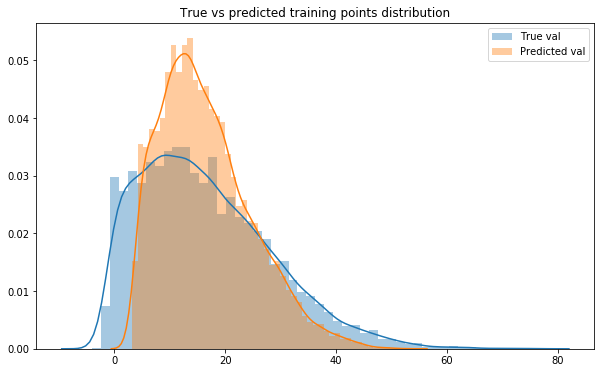

In [0]:
val_err = rmse(my_model.predict(X_val), y_val.fantasy_score.values)
train_err = rmse(my_model.predict(X_train), y_train.fantasy_score.values)

print(f'Train: {train_err}')
print(f'Validation: {val_err}')

plt.figure(figsize=(10,6))
sns.distplot(y_val,label='True val')
sns.distplot(my_model.predict(X_val), label ='Predicted val')
plt.legend()
plt.title('True vs predicted training points distribution')

#Extra Scratch Work (We can delete this later)

In [0]:
#extra comments from above

In [0]:
# ## Remember to drop following line from final EDA set. This is temporarily used to run things faster
# data = data.head(50000) #  For now, during development reduced data set to ensure syntax are right. Later on remove it
# data

In [0]:
# Later on create a new dataset leaving out some columns like original Date, time, DOB etc. 
# Many of these columns shall be filtered out from model as part of reducing noise variables

In [0]:
# selecting columns from the ones chosen above to create a dataset we have aggregated information abotu the player in general

# this table is the player on as each observation, and inforamtion about them. each column is aggreagted via an appropriate function.
# data[list(cols.keys())+['name']].groupby('name').agg(cols)


# some errors to fix

In [0]:
#sns.kdeplot(data['playMin'], data['fantasy_score'])

In [0]:
# basic training data to get
#basic_features = list(cols.keys()) + ['age','playDispNm','stk', 'playMin', 'fantasy_score']
#model_data = data[basic_features]
#print(model_data.shape)


In [0]:
#data.drop_duplicates(inplace=True)

In [0]:
# When Fantasy points column metrics is available, can add that to this pairplot